# DeepFace

In [1]:
!nvidia-smi

Mon May 13 04:07:21 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.78                 Driver Version: 550.78         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1060 6GB    Off |   00000000:01:00.0  On |                  N/A |
|  0%   52C    P8              9W /  130W |     437MiB /   6144MiB |     13%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from deepface import DeepFace
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
images = glob.glob('./assets/*.jpg')

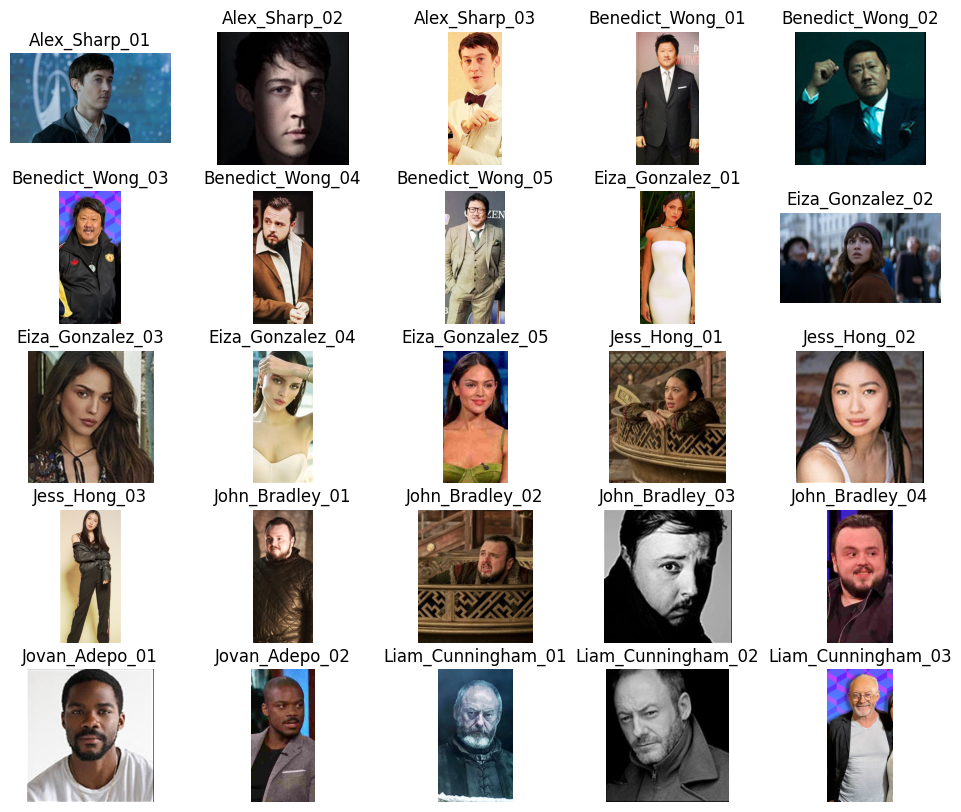

In [4]:
plt.figure(figsize=(12,10))

for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.title(images[i][9:-4])
    img = plt.imread(images[i])
    plt.imshow(img)
    plt.axis('off')

## Face Match

Compare an image to a reference image.

In [5]:
def pretty_print(result):
 print(f"Match: {result['verified']},\nDistance: {result['distance']},\nThreshold: {result['threshold']},\nTime: {result['time']},\nDetections :: x,y,w,h,left_eye,right_eye\n    IMG1: {result['facial_areas']['img1']['x']},{result['facial_areas']['img1']['y']},{result['facial_areas']['img1']['w']},{result['facial_areas']['img1']['h']},{result['facial_areas']['img1']['left_eye']},{result['facial_areas']['img1']['right_eye']}\n    IMG2: {result['facial_areas']['img2']['x']},{result['facial_areas']['img2']['y']},{result['facial_areas']['img2']['w']},{result['facial_areas']['img2']['h']},{result['facial_areas']['img2']['left_eye']},{result['facial_areas']['img2']['right_eye']}")

| Variable | Description | Options |
| -- | -- | -- |
| __model_name__ | Model for face recognition. | `VGG-Face`, `Facenet`, `Facenet512`, `OpenFace`, `DeepFace`, `DeepID`, `Dlib`, `ArcFace`, `SFace`, `GhostFaceNet` (default is VGG-Face). |
| __detector_backend__ | Face detector backend. | `opencv`, `retinaface`, `mtcnn`, `ssd`, `dlib`, `mediapipe`, `yolov8`, `centerface`, `skip` (default is opencv). |
| __distance_metric__ | Metric for measuring similarity. | `cosine`, `euclidean`, `euclidean_l2` (default is cosine). |

In [ ]:
result1 = DeepFace.verify(
    img1_path = "assets/Benedict_Wong_01.jpg",
    img2_path = "assets/Benedict_Wong_03.jpg",
    model_name = "VGG-Face",
    detector_backend = "opencv",
    distance_metric = "cosine",
    enforce_detection = True,
    align = True,
    expand_percentage = 0,
    normalization = "base",
    silent = True,
    threshold = 0.75,
) 

In [7]:
print(pretty_print(result1))

Match: True,
Distance: 0.2371475924188441,
Threshold: 0.75,
Time: 1.34,
Detections :: x,y,w,h,left_eye,right_eye
    IMG1: 149,79,167,167,(260, 144),(199, 146)
    IMG2: 77,85,157,157,None,None
None


In [ ]:
result2 = DeepFace.verify(
    img1_path = "assets/Benedict_Wong_01.jpg",
    img2_path = "assets/Benedict_Wong_02.jpg",
    model_name = "VGG-Face",
    detector_backend = "opencv",
    distance_metric = "cosine",
    enforce_detection = True,
    align = True,
    expand_percentage = 0,
    normalization = "base",
    silent = True,
    threshold = 0.75,
) 

In [7]:
print(pretty_print(result2))

Match: True,
Distance: 0.36789182962805234,
Threshold: 0.75,
Time: 4.86,
Detections :: x,y,w,h,left_eye,right_eye
    IMG1: 149,79,167,167,(260, 144),(199, 146)
    IMG2: 60,24,52,52,None,None
None


In [8]:
result3 = DeepFace.verify(
    img1_path = "assets/Benedict_Wong_01.jpg",
    img2_path = "assets/John_Bradley_04.jpg",
    model_name = "VGG-Face",
    detector_backend = "opencv",
    distance_metric = "cosine",
    enforce_detection = True,
    align = True,
    expand_percentage = 0,
    normalization = "base",
    silent = True,
    threshold = 0.75,
) 

In [9]:
print(pretty_print(result3))

Match: False,
Distance: 0.8878862927720679,
Threshold: 0.75,
Time: 0.42,
Detections :: x,y,w,h,left_eye,right_eye
    IMG1: 149,79,167,167,(260, 144),(199, 146)
    IMG2: 25,74,185,185,(151, 149),(83, 150)
None


## Compare Image to a set of Images

### VGG-Face / OpenCV

* _vgg_face_weights.h5_ - `552.3 MB`
* _24-05-09 12:32:58_ - `Searching assets/Eiza_Gonzalez_03.jpg in 26 length datastore`
* _24-05-09 12:32:58_ - `Find function duration 0.21913480758666992 seconds`

In [8]:
result4 = DeepFace.find(
    img_path = "assets/Eiza_Gonzalez_03.jpg",
    db_path = "assets",
    model_name = "VGG-Face",
    distance_metric = "cosine",
    enforce_detection = True,
    detector_backend = "opencv",
    align = True,
    expand_percentage = 0,
    threshold = 0.9,
    normalization = "base",
    silent = False,
)

24-05-13 04:08:47 - Searching assets/Eiza_Gonzalez_03.jpg in 26 length datastore
24-05-13 04:08:47 - find function duration 0.40889477729797363 seconds


| # | identity | hash | target_x | target_y | target_w | target_h | source_x | source_y | source_w | source_h | threshold | distance |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | assets/Eiza_Gonzalez_03.jpg | c851bc623b011079548c899eedc96a0b8c1a9264 | 42 | 27 | 71 | 71 | 42 | 27 | 71 | 71 | 0.9 | -2.220446e-16 |
| 1 | assets/Eiza_Gonzalez_05.jpg | 4e3c950ef9084dd264e056711afd7a949dfb5f95 | 49 | 61 | 148 | 148 | 42 | 27 | 71 | 71 | 0.9 | 5.568067e-01 |
| 2 | assets/John_Bradley_01.jpg | 7619cdf25b6b4071aa6ebd9408e001f372cee5bc | 69 | 142 | 236 | 236 | 42 | 27 | 71 | 71 | 0.9 | 8.328525e-01 |
| 3 | assets/John_Bradley_04.jpg | d4c9635f2c37df80ade71f405b296ac98d68e690 | 25 | 74 | 185 | 185 | 42 | 27 | 71 | 71 | 0.9 | 8.535972e-01 |
| 4 | assets/Eiza_Gonzalez_02.jpg | 220a99ec5380b5d4033dd18f6f54353a49bb341b | 462 | 125 | 246 | 246 | 42 | 27 | 71 | 71 | 0.9 | 8.668110e-01 |
| 5 | assets/Jess_Hong_02.jpg | 1233412de754501680ab281fdd0b3c0b7e634279 | 34 | 19 | 81 | 81 | 42 | 27 | 71 | 71 | 0.9 | 8.805470e-01 |

In [127]:
image_results = [
    ['./assets/Eiza_Gonzalez_03.jpg',  1.0000000000000002],
    ['./assets/Eiza_Gonzalez_05.jpg',  0.4431933],
    ['./assets/John_Bradley_01.jpg',  0.1671475],
    ['./assets/John_Bradley_04.jpg',  0.14640280000000006],
    ['./assets/Eiza_Gonzalez_02.jpg',  0.133189],
    ['./assets/Jess_Hong_02.jpg',  0.11945300000000003]
]

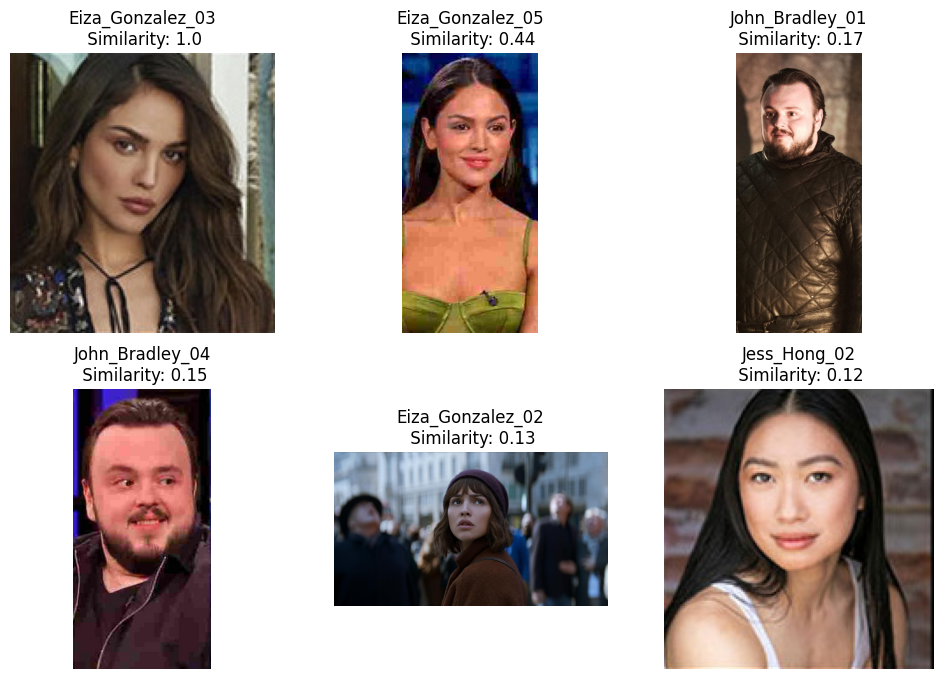

In [128]:
plt.figure(figsize=(12,8))

for i in range(len(image_results)):
    ax = plt.subplot(2,3,i+1)
    plt.title(
        image_results[i][0][9:-4]+'\n Similarity: '+str(round(image_results[i][1],2))
    )
    img = plt.imread(image_results[i][0])
    plt.imshow(img)
    plt.axis('off')

In [141]:
data_images = [
    'Eiza_Gonzalez_03.jpg',
    'Eiza_Gonzalez_05.jpg',
    'John_Bradley_01.jpg',
    'John_Bradley_04.jpg',
    'Eiza_Gonzalez_02.jpg',
    'Jess_Hong_02.jpg'
]

distance_data = [
     -2.220446e-16,
     5.568067e-01,
     8.328525e-01,
     8.535972e-01,
     8.668110e-01,
     8.805470e-01
]

similarity_data = [
     1.0000000000000002,
     0.4431933,
     0.1671475,
     0.14640280000000006,
     0.133189,
     0.11945300000000003
]

result_4_df = pd.DataFrame({ 
    'Images': data_images, 
    'Distance': distance_data, 
    'Similarity': similarity_data  
}) 

result_4_df

Images      Distance  Similarity
0  Eiza_Gonzalez_03.jpg -2.220446e-16    1.000000
1  Eiza_Gonzalez_05.jpg  5.568067e-01    0.443193
2   John_Bradley_01.jpg  8.328525e-01    0.167148
3   John_Bradley_04.jpg  8.535972e-01    0.146403
4  Eiza_Gonzalez_02.jpg  8.668110e-01    0.133189
5      Jess_Hong_02.jpg  8.805470e-01    0.119453

<Axes: xlabel='Images'>

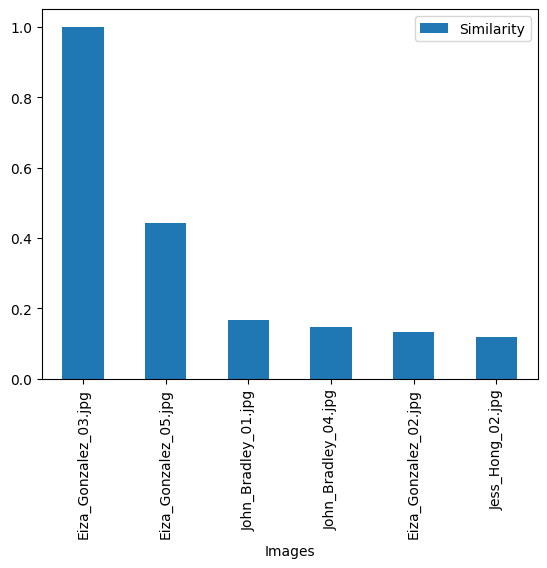

In [144]:
result_4_df.plot(x="Images", y="Similarity", kind="bar")

### Dlib / dlib

* _dlib_face_recognition_resnet_model_v1.dat.bz2_ - `20.4 MB`
* _24-05-09 10:29:22_ - `Searching assets/Eiza_Gonzalez_03.jpg in 26 length datastore`
* _24-05-09 10:29:23_ - `Find function duration 0.13037323951721191 seconds`

In [87]:
result5 = DeepFace.find(
    img_path = "assets/Eiza_Gonzalez_03.jpg",
    db_path = "assets",
    model_name = "Dlib",
    distance_metric = "cosine",
    enforce_detection = True,
    detector_backend = "dlib",
    align = True,
    expand_percentage = 0,
    threshold = 0.60,
    normalization = "base",
    silent = False,
)

24-05-09 10:29:22 - Searching assets/Eiza_Gonzalez_03.jpg in 26 length datastore
24-05-09 10:29:23 - find function duration 0.13037323951721191 seconds


| # | identity | hash | target_x | target_y | target_w | target_h | source_x | source_y | source_w | source_h | threshold | distance |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | assets/Eiza_Gonzalez_03.jpg | c851bc623b011079548c899eedc96a0b8c1a9264 | 45 | 32 | 62 | 62 | 45 | 32 | 62 | 62 | 0.6 | -2.220446e-16 |
| 1 | assets/Eiza_Gonzalez_01.jpg | dd70311d238d2be8b47aee363e3f228b741c3b50 | 201 | 81 | 155 | 155 | 45 | 32 | 62 | 62 | 0.6 | 3.507291e-02 |
| 2 | assets/Eiza_Gonzalez_04.jpg | 863a9e1f9f06ff1da45ef39de64f03a24d768164 | 24 | 53 | 63 | 62 | 45 | 32 | 62 | 62 | 0.6 | 5.434244e-02 |
| 3 | assets/Eiza_Gonzalez_05.jpg | 4e3c950ef9084dd264e056711afd7a949dfb5f95 | 53 | 82 | 129 | 129 | 45 | 32 | 62 | 62 | 0.6 | 7.985102e-02 |
| 4 | assets/Eiza_Gonzalez_02.jpg | 220a99ec5380b5d4033dd18f6f54353a49bb341b | 464 | 167 | 223 | 223 | 45 | 32 | 62 | 62 | 0.6 | 8.234110e-02 |
| 5 | assets/Alex_Sharp_02.jpg | c95ee8e7698895fe15c561a9cb5adeda43f56ef4 | 46 | 46 | 89 | 90 | 45 | 32 | 62 | 62 | 0.6 | 1.173593e-01 |
| 6 | assets/Jess_Hong_01.jpg | 46312c1e70040518e2e9ed9e6068cefed5724c08 | 95 | 61 | 52 | 52 | 45 | 32 | 62 | 62 | 0.6 | 1.268085e-01 |
| 7 | assets/Jess_Hong_02.jpg | 1233412de754501680ab281fdd0b3c0b7e634279 | 38 | 30 | 75 | 75 | 45 | 32 | 62 | 62 | 0.6 | 1.458864e-01 |
| 8 | assets/John_Bradley_03.jpg | 9686d791c5a87ff6060e721caf66f2532f92300a | 44 | 32 | 107 | 108 | 45 | 32 | 62 | 62 | 0.6 | 1.475067e-01 |
| 9 | assets/John_Bradley_02.jpg | 7f0317379f612eb44096207202e3cc91e441a58e | 107 | 66 | 63 | 63 | 45 | 32 | 62 | 62 | 0.6 | 1.524923e-01 |
| 10 | assets/John_Bradley_01.jpg | 7619cdf25b6b4071aa6ebd9408e001f372cee5bc | 68 | 142 | 223 | 223 | 45 | 32 | 62 |  62 | 0.6 | 1.616775e-01 |
| 11 | assets/Benedict_Wong_04.jpg | dbb025ab8039915335d84700c6423fadfa91c5b3 | 11 | 46 | 62 | 62 | 45 | 32 | 62 |  62 | 0.6 | 1.624690e-01 |
| 12 | assets/Jess_Hong_03.jpg | 9b056b12303c62eeee91c49456bdda7f494aa078 | 199 | 44 | 107 | 108 | 45 | 32 | 62 |  62 | 0.6 | 1.630522e-01 |
| 13 | assets/Alex_Sharp_01.jpg | 7155ec0a507fd98583c179beb164c9fcfa0fa917 | 211 | 44 | 107 | 108 | 45 | 32 | 62 |  62 | 0.6 | 1.663933e-01 |
| 14 | assets/Alex_Sharp_03.jpg | 48a617ed38787e3dd5e7d7e87e2a56b37214ce38 | 82 | 142 | 267 | 267 | 45 | 32 | 62 |  62 | 0.6 | 1.686072e-01 |
| 15 | assets/Jovan_Adepo_01.jpg | 47bc06e224a2538aa258c0b5d03f478e5713b8bc | 38 | 30 | 75 | 75 | 45 | 32 | 62 |  62 | 0.6 | 1.723205e-01 |
| 16 | assets/Liam_Cunningham_04.jpg | 48cfc1ce0fec1aa61293d5d95478c694fa840686 | 56 | 77 | 165 | 186 | 45 | 32 | 62 |  62 | 0.6 | 1.757963e-01 |
| 17 | assets/John_Bradley_04.jpg | d4c9635f2c37df80ade71f405b296ac98d68e690 | 15 | 98 | 186 | 186 | 45 | 32 | 62 |  62 | 0.6 | 1.834919e-01 |
| 18 | assets/Liam_Cunningham_02.jpg | 5b5aa2bddb00a676c599ab365031336ec1c9e00e | 0 | 26 | 86 | 90 | 45 | 32 | 62 |  62 | 0.6 | 1.899648e-01 |
| 19 | assets/Benedict_Wong_02.jpg | f8aa9b6edaf2e71f3c69cec9548c27519ba1914c | 60 | 26 | 52 | 52 | 45 | 32 | 62 |  62 | 0.6 | 1.958830e-01 |
| 20 | assets/Liam_Cunningham_01.jpg | a157a9143b88b9844ea65f1ccea484a337670853 | 98 | 170 | 321 | 321 | 45 | 32 | 62 |  62 | 0.6 | 1.977721e-01 |
| 21 | assets/Benedict_Wong_05.jpg | 4f14065c9065e745f63b1ca22c206649922eaee2 | 40 | 26 | 44 | 44 | 45 | 32 | 62 |  62 | 0.6 | 2.021431e-01 |
| 22 | assets/Jovan_Adepo_02.jpg | f5428170e3323a333121ceb196675526d8ad02c6 | 67 | 82 | 129 | 129 | 45 | 32 | 62 |  62 | 0.6 | 2.065918e-01 |
| 23 | assets/Liam_Cunningham_03.jpg | d349c11690daa1a9e118df5d4ae08d554852a96a | 98 | 81 | 155 | 155 | 45 | 32 | 62 |  62 | 0.6 | 2.114577e-01 |
| 24 | assets/Benedict_Wong_01.jpg | 5594e234a03a4a8fb8c8c2a29310cb6497635317 | 167 | 110 | 129 | 129 | 45 | 32 | 62 |  62 | 0.6 | 2.213369e-01 |
| 25 | assets/Benedict_Wong_03.jpg | 7626233c27c3925bb4d15b301f525ec82e14c868 | 96 | 110 | 129 | 129 | 45 | 32 | 62 |  62 | 0.6 | 2.251138e-01 |

In [129]:
image_results = [
    ['./assets/Eiza_Gonzalez_03.jpg',  1.0000000000000002],
    ['./assets/Eiza_Gonzalez_01.jpg',  0.96492709],
    ['./assets/Eiza_Gonzalez_04.jpg',  0.94565756],
    ['./assets/Eiza_Gonzalez_05.jpg',  0.92014898],
    ['./assets/Eiza_Gonzalez_02.jpg',  0.9176588999999999],
    ['./assets/Alex_Sharp_02.jpg',  0.8826407000000001]
]

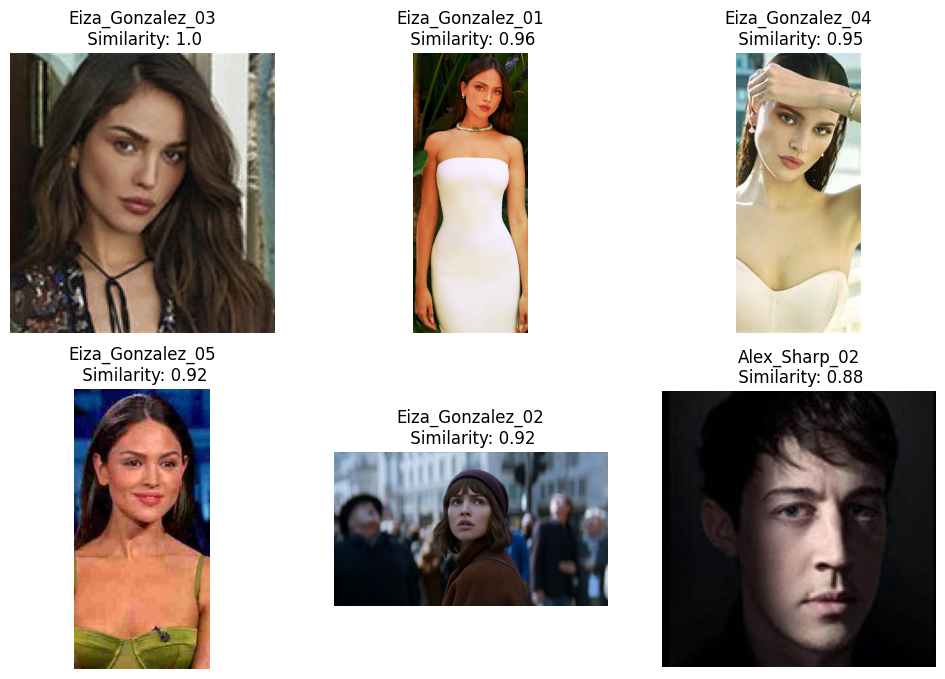

In [130]:
plt.figure(figsize=(12,8))

for i in range(len(image_results)):
    ax = plt.subplot(2,3,i+1)
    plt.title(
        image_results[i][0][9:-4]+'\n Similarity: '+str(round(image_results[i][1],2))
    )
    img = plt.imread(image_results[i][0])
    plt.imshow(img)
    plt.axis('off')

In [173]:
data_images = [
    'Eiza_Gonzalez_03.jpg',
    'Eiza_Gonzalez_01.jpg',
    'Eiza_Gonzalez_04.jpg',
    'Eiza_Gonzalez_05.jpg',
    'Eiza_Gonzalez_02.jpg',
    'Alex_Sharp_02.jpg',
    'Jess_Hong_01.jpg',
    'Jess_Hong_02.jpg',
    'John_Bradley_03.jpg',
    'John_Bradley_02.jpg',
    'John_Bradley_01.jpg',
    'Benedict_Wong_04.jpg',
    'Jess_Hong_03.jpg',
    'Alex_Sharp_01.jpg',
    'Alex_Sharp_03.jpg',
    'Jovan_Adepo_01.jpg',
    'Liam_Cunningham_04.jpg',
    'John_Bradley_04.jpg',
    'Liam_Cunningham_02.jpg',
    'Benedict_Wong_02.jpg',
    'Liam_Cunningham_01.jpg',
    'Benedict_Wong_05.jpg',
    'Jovan_Adepo_02.jpg',
    'Liam_Cunningham_03.jpg',
    'Benedict_Wong_01.jpg',
    'Benedict_Wong_03.jpg'
]

distance_data = [
     -2.220446e-16,
     3.507291e-02,
     5.434244e-02,
     7.985102e-02,
     8.234110e-02,
     1.173593e-01,
     1.268085e-01,
     1.458864e-01,
     1.475067e-01,
     1.524923e-01,
     1.616775e-01,
     1.624690e-01,
     1.630522e-01,
     1.663933e-01,
     1.686072e-01,
     1.723205e-01,
     1.757963e-01,
     1.834919e-01,
     1.899648e-01,
     1.958830e-01,
     1.977721e-01,
     2.021431e-01,
     2.065918e-01,
     2.114577e-01,
     2.213369e-01,
     2.251138e-01,
]

similarity_data = [
     1.0000000000000002,
     0.96492709,
     0.94565756,
     0.92014898,
     0.9176588999999999,
     0.8826407000000001,
     0.8731915,
     0.8541136,
     0.8524933,
     0.8475077,
     0.8383225,
     0.837531,
     0.8369478,
     0.8336067,
     0.8313927999999999,
     0.8276795,
     0.8242037,
     0.8165081,
     0.8100352,
     0.804117,
     0.8022279,
     0.7978569,
     0.7934082,
     0.7885423,
     0.7786630999999999,
     0.7748862,
]

result_5_df = pd.DataFrame({ 
    'Images': data_images, 
    'Distance': distance_data, 
    'Similarity': similarity_data  
}) 

result_5_df

Images      Distance  Similarity
0     Eiza_Gonzalez_03.jpg -2.220446e-16    1.000000
1     Eiza_Gonzalez_01.jpg  3.507291e-02    0.964927
2     Eiza_Gonzalez_04.jpg  5.434244e-02    0.945658
3     Eiza_Gonzalez_05.jpg  7.985102e-02    0.920149
4     Eiza_Gonzalez_02.jpg  8.234110e-02    0.917659
5        Alex_Sharp_02.jpg  1.173593e-01    0.882641
6         Jess_Hong_01.jpg  1.268085e-01    0.873192
7         Jess_Hong_02.jpg  1.458864e-01    0.854114
8      John_Bradley_03.jpg  1.475067e-01    0.852493
9      John_Bradley_02.jpg  1.524923e-01    0.847508
10     John_Bradley_01.jpg  1.616775e-01    0.838322
11    Benedict_Wong_04.jpg  1.624690e-01    0.837531
12        Jess_Hong_03.jpg  1.630522e-01    0.836948
13       Alex_Sharp_01.jpg  1.663933e-01    0.833607
14       Alex_Sharp_03.jpg  1.686072e-01    0.831393
15      Jovan_Adepo_01.jpg  1.723205e-01    0.827680
16  Liam_Cunningham_04.jpg  1.757963e-01    0.824204
17     John_Bradley_04.jpg  1.834919e-01    0.816508
18  Liam_Cunningham_02.jpg  1.899648e-01    0.810035
19    Benedict_Wong_02.jpg  1.958830e-01    0.804117
20  Liam_Cunningham_01.jpg  1.977721e-01    0.802228
21    Benedict_Wong_05.jpg  2.021431e-01    0.797857
22      Jovan_Adepo_02.jpg  2.065918e-01    0.793408
23  Liam_Cunningham_03.jpg  2.114577e-01    0.788542
24    Benedict_Wong_01.jpg  2.213369e-01    0.778663
25    Benedict_Wong_03.jpg  2.251138e-01    0.774886

<Axes: xlabel='Images'>

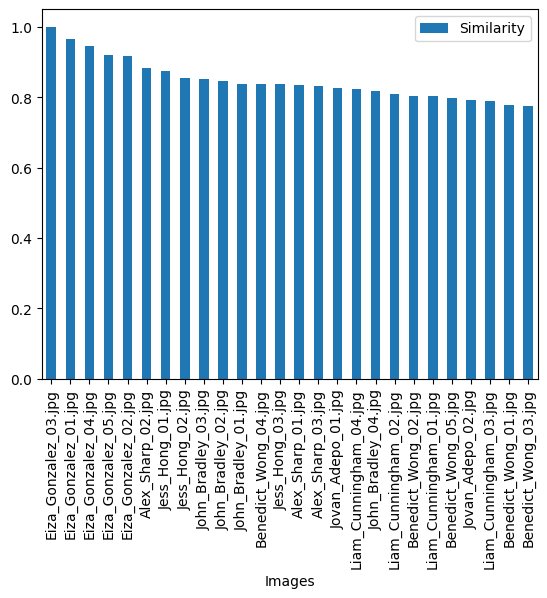

In [174]:
result_5_df.plot(x="Images", y="Similarity", kind="bar")

### Dlib / Mediapipe

* _dlib_face_recognition_resnet_model_v1.dat.bz2_ - `20.4 MB`
* _shape_predictor_5_face_landmarks.dat.bz2_ - `5.4 MB`
* _24-05-10 07:38:39_ - `Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore`
* _24-05-10 07:38:39_ - `Find function duration 0.3898661136627197 seconds`

In [68]:
result6 = DeepFace.find(
    img_path = "assets/Eiza_Gonzalez_03.jpg",
    db_path = "assets",
    model_name = "Dlib",
    distance_metric = "cosine",
    enforce_detection = True,
    detector_backend = "mediapipe",
    align = True,
    expand_percentage = 0,
    threshold = 0.60,
    normalization = "base",
    silent = False,
)

24-05-10 07:38:39 - Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore
24-05-10 07:38:39 - find function duration 0.3898661136627197 seconds


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


| # | identity | hash | target_x | target_y | target_w | target_h | source_x | source_y | source_w | source_h | threshold | distance |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | assets/Eiza_Gonzalez_03.jpg | c851bc623b011079548c899eedc96a0b8c1a9264 | 37 | 36 | 65 | 65 | 37 | 36 | 65 | 65 | 0.6 | 0.000000 |
| 1 | assets/Eiza_Gonzalez_02.jpg | 220a99ec5380b5d4033dd18f6f54353a49bb341b | 509 | 181 | 197 | 197 | 37 | 36 | 65 | 65 | 0.6 | 0.058698 |
| 2 | assets/Eiza_Gonzalez_04.jpg | 863a9e1f9f06ff1da45ef39de64f03a24d768164 | 16 | 41 | 80 | 80 | 37 | 36 | 65 | 65 | 0.6 | 0.069220 |
| 3 | assets/Eiza_Gonzalez_05.jpg | 4e3c950ef9084dd264e056711afd7a949dfb5f95 | 49 | 84 | 133 | 133 | 37 | 36 | 65 | 65 | 0.6 | 0.070974 |
| 4 | assets/Jess_Hong_01.jpg | 46312c1e70040518e2e9ed9e6068cefed5724c08 | 113 | 71 | 48 | 48 | 37 | 36 | 65 | 65 | 0.6 | 0.116602 |
| 5 | assets/Jess_Hong_02.jpg | 1233412de754501680ab281fdd0b3c0b7e634279 | 39 | 28 | 75 | 75 | 37 | 36 | 65 | 65 | 0.6 | 0.122306 |
| 6 | assets/John_Bradley_03.jpg | 9686d791c5a87ff6060e721caf66f2532f92300a | 32 | 36 | 104 | 104 | 37 | 36 | 65 | 65 | 0.6 | 0.127752 |
| 7 | assets/Alex_Sharp_02.jpg | c95ee8e7698895fe15c561a9cb5adeda43f56ef4 | 38 | 47 | 101 | 101 | 37 | 36 | 65 | 65 | 0.6 | 0.145324 |
| 8 | assets/Alex_Sharp_01.jpg | 7155ec0a507fd98583c179beb164c9fcfa0fa917 | 202 | 57 | 107 | 107 | 37 | 36 | 65 | 65 | 0.6 | 0.148071 |
| 9 | assets/John_Bradley_02.jpg | 7f0317379f612eb44096207202e3cc91e441a58e | 120 | 77 | 53 | 53 | 37 | 36 | 65 | 65 | 0.6 | 0.154632 |
| 10 | assets/Liam_Cunningham_02.jpg | 5b5aa2bddb00a676c599ab365031336ec1c9e00e | 12 | 29 | 84 | 84 | 37 | 36 | 65 | 65 | 0.6 | 0.163341 |
| 11 | assets/John_Bradley_01.jpg | 7619cdf25b6b4071aa6ebd9408e001f372cee5bc | 96 | 184 | 208 | 208 | 37 | 36 | 65 | 65 | 0.6 | 0.164641 |
| 12 | assets/Alex_Sharp_03.jpg | 48a617ed38787e3dd5e7d7e87e2a56b37214ce38 | 106 | 156 | 267 | 267 | 37 | 36 | 65 | 65 | 0.6 | 0.164873 |
| 13 | assets/Eiza_Gonzalez_02.jpg | 220a99ec5380b5d4033dd18f6f54353a49bb341b | 55 | 271 | 201 | 201 | 37 | 36 | 65 | 65 | 0.6 | 0.168053 |
| 14 | assets/Liam_Cunningham_04.jpg | 48cfc1ce0fec1aa61293d5d95478c694fa840686 | 44 | 99 | 151 | 151 | 37 | 36 | 65 | 65 | 0.6 | 0.171255 |
| 15 | assets/Benedict_Wong_04.jpg | dbb025ab8039915335d84700c6423fadfa91c5b3 | 13 | 46 | 56 | 56 | 37 | 36 | 65 | 65 | 0.6 | 0.178435 |
| 16 | assets/Benedict_Wong_02.jpg | f8aa9b6edaf2e71f3c69cec9548c27519ba1914c | 64 | 34 | 43 | 43 | 37 | 36 | 65 | 65 | 0.6 | 0.186274 |
| 17 | assets/Benedict_Wong_05.jpg | 4f14065c9065e745f63b1ca22c206649922eaee2 | 41 | 29 | 40 | 40 | 37 | 36 | 65 | 65 | 0.6 | 0.191297 |
| 18 | assets/John_Bradley_04.jpg | d4c9635f2c37df80ade71f405b296ac98d68e690 | 27 | 111 | 168 | 168 | 37 | 36 | 65 | 65 | 0.6 | 0.197620 |
| 19 | assets/Liam_Cunningham_01.jpg | a157a9143b88b9844ea65f1ccea484a337670853 | 114 | 215 | 262 | 262 | 37 | 36 | 65 | 65 | 0.6 | 0.202479 |
| 20 | assets/Jovan_Adepo_02.jpg | f5428170e3323a333121ceb196675526d8ad02c6 | 59 | 96 | 125 | 125 | 37 | 36 | 65 | 65 | 0.6 | 0.204949 |
| 21 | assets/Benedict_Wong_01.jpg | 5594e234a03a4a8fb8c8c2a29310cb6497635317 | 150 | 107 | 160 | 160 | 37 | 36 | 65 | 65 | 0.6 | 0.223669  |
| 22 | assets/Jovan_Adepo_01.jpg | 47bc06e224a2538aa258c0b5d03f478e5713b8bc | 42 | 36 | 71 | 71 | 37 | 36 | 65 | 65 | 0.6 | 0.246249 |

In [131]:
image_results = [
    ['./assets/Eiza_Gonzalez_03.jpg',  1.000000000000000],
    ['./assets/Eiza_Gonzalez_02.jpg',  0.941302],
    ['./assets/Eiza_Gonzalez_04.jpg',  0.9307799999999999],
    ['./assets/Eiza_Gonzalez_05.jpg',  0.929026],
    ['./assets/Jess_Hong_01.jpg',  0.883398],
    ['./assets/Jess_Hong_02.jpg',  0.877694]
]

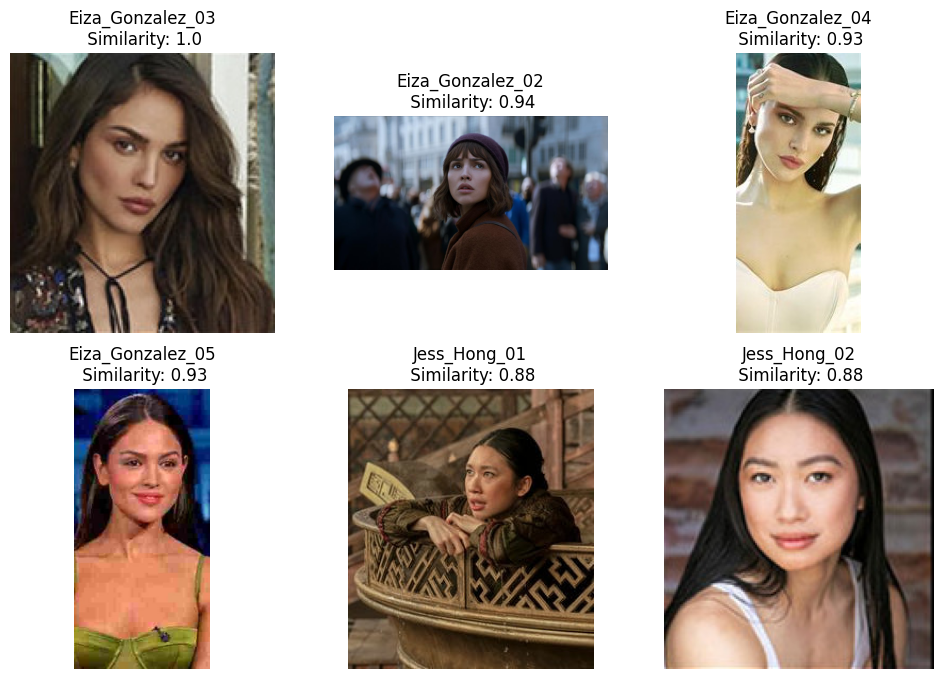

In [132]:
plt.figure(figsize=(12,8))

for i in range(len(image_results)):
    ax = plt.subplot(2,3,i+1)
    plt.title(
        image_results[i][0][9:-4]+'\n Similarity: '+str(round(image_results[i][1],2))
    )
    img = plt.imread(image_results[i][0])
    plt.imshow(img)
    plt.axis('off')

In [197]:
data_images = [
    'Eiza_Gonzalez_03.jpg',
    'Eiza_Gonzalez_02.jpg',
    'Eiza_Gonzalez_04.jpg',
    'Eiza_Gonzalez_05.jpg',
    'Jess_Hong_01.jpg',
    'Jess_Hong_02.jpg',
    'John_Bradley_03.jpg',
    'Alex_Sharp_02.jpg',
    'Alex_Sharp_01.jpg',
    'John_Bradley_02.jpg',
    'Liam_Cunningham_02.jpg',
    'John_Bradley_01.jpg',
    'Alex_Sharp_03.jpg',
    'Eiza_Gonzalez_02.jpg',
    'Liam_Cunningham_04.jpg',
    'Benedict_Wong_04.jpg',
    'Benedict_Wong_02.jpg',
    'Benedict_Wong_05.jpg',
    'John_Bradley_04.jpg',
    'Liam_Cunningham_01.jpg',
    'Jovan_Adepo_02.jpg',
    'Benedict_Wong_01.jpg',
    'Jovan_Adepo_01.jpg'
]

distance_data = [
     0.000000,
     0.058698,
     0.069220,
     0.070974,
     0.116602,
     0.122306,
     0.127752,
     0.145324,
     0.148071,
     0.154632,
     0.163341,
     0.164641,
     0.164873,
     0.168053,
     0.171255,
     0.178435,
     0.186274,
     0.191297,
     0.197620,
     0.202479,
     0.204949,
     0.223669,
     0.246249
]

similarity_data = [
     1.0,
     0.941302,
     0.9307799999999999,
     0.929026,
     0.883398,
     0.877694,
     0.872248,
     0.854676,
     0.8519289999999999,
     0.845368,
     0.836659,
     0.835359,
     0.835127,
     0.831947,
     0.8287450000000001,
     0.821565,
     0.813726,
     0.808703,
     0.80238,
     0.797521,
     0.795051,
     0.776331,
     0.7537510000000001
]

result_6_df = pd.DataFrame({ 
    'Images': data_images, 
    'Distance': distance_data, 
    'Similarity': similarity_data  
}) 

result_6_df

Images  Distance  Similarity
0     Eiza_Gonzalez_03.jpg  0.000000    1.000000
1     Eiza_Gonzalez_02.jpg  0.058698    0.941302
2     Eiza_Gonzalez_04.jpg  0.069220    0.930780
3     Eiza_Gonzalez_05.jpg  0.070974    0.929026
4         Jess_Hong_01.jpg  0.116602    0.883398
5         Jess_Hong_02.jpg  0.122306    0.877694
6      John_Bradley_03.jpg  0.127752    0.872248
7        Alex_Sharp_02.jpg  0.145324    0.854676
8        Alex_Sharp_01.jpg  0.148071    0.851929
9      John_Bradley_02.jpg  0.154632    0.845368
10  Liam_Cunningham_02.jpg  0.163341    0.836659
11     John_Bradley_01.jpg  0.164641    0.835359
12       Alex_Sharp_03.jpg  0.164873    0.835127
13    Eiza_Gonzalez_02.jpg  0.168053    0.831947
14  Liam_Cunningham_04.jpg  0.171255    0.828745
15    Benedict_Wong_04.jpg  0.178435    0.821565
16    Benedict_Wong_02.jpg  0.186274    0.813726
17    Benedict_Wong_05.jpg  0.191297    0.808703
18     John_Bradley_04.jpg  0.197620    0.802380
19  Liam_Cunningham_01.jpg  0.202479    0.797521
20      Jovan_Adepo_02.jpg  0.204949    0.795051
21    Benedict_Wong_01.jpg  0.223669    0.776331
22      Jovan_Adepo_01.jpg  0.246249    0.753751

<Axes: xlabel='Images'>

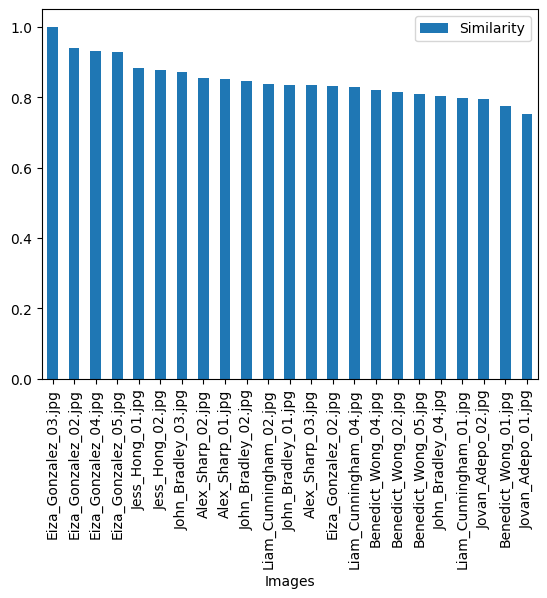

In [198]:
result_6_df.plot(x="Images", y="Similarity", kind="bar")

In [ ]:
!pip install mediapipe ultralytics

### Dlib / YOLOv8

* _dlib_face_recognition_resnet_model_v1.dat.bz2_ - `20.4 MB`
* _yolov8n-face.pt_ - `6.1 MB`
* _24-05-10 07:37:37_ - `Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore`
* _24-05-10 07:37:37_ - `Find function duration 0.12443137168884277 seconds`

In [67]:
result7 = DeepFace.find(
    img_path = "assets/Eiza_Gonzalez_03.jpg",
    db_path = "assets",
    model_name = "Dlib",
    distance_metric = "cosine",
    enforce_detection = True,
    detector_backend = "yolov8",
    align = True,
    expand_percentage = 0,
    threshold = 0.60,
    normalization = "base",
    silent = False,
)

24-05-10 07:37:37 - Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore
24-05-10 07:37:37 - find function duration 0.12443137168884277 seconds


| # | identity | hash | target_x | target_y | target_w | target_h | source_x | source_y | source_w | source_h | threshold | distance |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | assets/Eiza_Gonzalez_03.jpg | c851bc623b011079548c899eedc96a0b8c1a9264 | 39 | 19 | 62 | 84 | 39 | 19 | 62 | 84 | 0.6 | 0.000000 |
| 1 | assets/Eiza_Gonzalez_01.jpg | dd70311d238d2be8b47aee363e3f228b741c3b50 | 203 | 65 | 139 | 183 | 39 | 19 | 62 | 84 | 0.6 | 0.045388 |
| 2 | assets/Eiza_Gonzalez_05.jpg | 4e3c950ef9084dd264e056711afd7a949dfb5f95 | 57 | 53 | 119 | 163 | 39 | 19 | 62 | 84 | 0.6 | 0.046588 |
| 3 | assets/Jess_Hong_02.jpg | 1233412de754501680ab281fdd0b3c0b7e634279 | 43 | 14 | 67 | 89 | 39 | 19 | 62 | 84 | 0.6 | 0.055280 |
| 4 | assets/Eiza_Gonzalez_04.jpg | 863a9e1f9f06ff1da45ef39de64f03a24d768164 | 19 | 23 | 79 | 97 | 39 | 19 | 62 | 84 | 0.6 | 0.063742 |
| 5 | assets/Jess_Hong_01.jpg | 46312c1e70040518e2e9ed9e6068cefed5724c08 | 110 | 54 | 48 | 69 | 39 | 19 | 62 | 84 | 0.6 | 0.066402 |
| 6 | assets/Alex_Sharp_02.jpg | c95ee8e7698895fe15c561a9cb5adeda43f56ef4 | 39 | 16 | 92 | 135 | 39 | 19 | 62 | 84 | 0.6 | 0.084785 |
| 7 | assets/Liam_Cunningham_04.jpg | 48cfc1ce0fec1aa61293d5d95478c694fa840686 | 58 | 52 | 140 | 207 | 39 | 19 | 62 | 84 | 0.6 | 0.086134 |
| 8 | assets/Jess_Hong_03.jpg | 9b056b12303c62eeee91c49456bdda7f494aa078 | 206 | 24 | 101 | 135 | 39 | 19 | 62 | 84 | 0.6 | 0.086582 |
| 9 | assets/Eiza_Gonzalez_02.jpg | 220a99ec5380b5d4033dd18f6f54353a49bb341b | 497 | 132 | 192 | 252 | 39 | 19 | 62 | 84 | 0.6 | 0.086979 |
| 10 | assets/Benedict_Wong_04.jpg | dbb025ab8039915335d84700c6423fadfa91c5b3 | 19 | 31 | 52 | 74 | 39 | 19 | 62 | 84 | 0.6 | 0.088260 |
| 11 | assets/John_Bradley_03.jpg | 9686d791c5a87ff6060e721caf66f2532f92300a | 36 | 20 | 95 | 134 | 39 | 19 | 62 | 84 | 0.6 | 0.091857 |
| 12 | assets/Alex_Sharp_01.jpg | 7155ec0a507fd98583c179beb164c9fcfa0fa917 | 207 | 42 | 93 | 123 | 39 | 19 | 62 | 84 | 0.6 | 0.104845 |
| 13 | assets/John_Bradley_04.jpg | d4c9635f2c37df80ade71f405b296ac98d68e690 | 31 | 60 | 166 | 214 | 39 | 19 | 62 | 84 | 0.6 | 0.104869 |
| 14 | assets/Eiza_Gonzalez_02.jpg | 220a99ec5380b5d4033dd18f6f54353a49bb341b | 69 | 218 | 132 | 157 | 39 | 19 | 62 | 84 | 0.6 | 0.104911 |
| 15 | assets/John_Bradley_01.jpg | 7619cdf25b6b4071aa6ebd9408e001f372cee5bc | 99 | 114 | 198 | 282 | 39 | 19 | 62 | 84 | 0.6 | 0.108680 |
| 16 | assets/Liam_Cunningham_02.jpg | 5b5aa2bddb00a676c599ab365031336ec1c9e00e | 11 | 10 | 80 | 104 | 39 | 19 | 62 | 84 | 0.6 | 0.111524 |
| 17 | assets/John_Bradley_02.jpg | 7f0317379f612eb44096207202e3cc91e441a58e | 119 | 62 | 55 | 75 | 39 | 19 | 62 | 84 | 0.6 | 0.113892 |
| 18 | assets/Benedict_Wong_05.jpg | 4f14065c9065e745f63b1ca22c206649922eaee2 | 45 | 18 | 36 | 49 | 39 | 19 | 62 | 84 | 0.6 | 0.125120 |
| 19 | assets/Alex_Sharp_03.jpg | 48a617ed38787e3dd5e7d7e87e2a56b37214ce38 | 110 | 111 | 248 | 345 | 39 | 19 | 62 | 84 | 0.6 | 0.126874 |
| 20 | assets/Benedict_Wong_02.jpg | f8aa9b6edaf2e71f3c69cec9548c27519ba1914c | 64 | 23 | 44 | 54 | 39 | 19 | 62 | 84 | 0.6 | 0.127946 |
| 21 | assets/Benedict_Wong_01.jpg | 5594e234a03a4a8fb8c8c2a29310cb6497635317 | 166 | 74 | 138 | 185 | 39 | 19 | 62 | 84 | 0.6 | 0.134841 |
| 22 | assets/Benedict_Wong_03.jpg | 7626233c27c3925bb4d15b301f525ec82e14c868 | 89 | 84 | 130 | 173 | 39 | 19 | 62 | 84 | 0.6 | 0.145167 |
| 23 | assets/Jovan_Adepo_01.jpg | 47bc06e224a2538aa258c0b5d03f478e5713b8bc | 46 | 16 | 64 | 92 | 39 | 19 | 62 | 84 | 0.6 | 0.146045 |
| 24 | assets/Liam_Cunningham_01.jpg | a157a9143b88b9844ea65f1ccea484a337670853 | 137 | 163 | 231 | 319 | 39 | 19 | 62 | 84 | 0.6 | 0.151728 |
| 25 | assets/Jovan_Adepo_02.jpg | f5428170e3323a333121ceb196675526d8ad02c6 | 63 | 59 | 117 | 169 | 39 | 19 | 62 | 84 | 0.6 | 0.153202 |
| 26 | assets/Liam_Cunningham_03.jpg | d349c11690daa1a9e118df5d4ae08d554852a96a | 118 | 58 | 130 | 184 | 39 | 19 | 62 | 84 | 0.6 | 0.157119 |

In [133]:
image_results = [
    ['./assets/Eiza_Gonzalez_03.jpg',  1.000000000000000],
    ['./assets/Eiza_Gonzalez_01.jpg',  0.954612],
    ['./assets/Eiza_Gonzalez_05.jpg',  0.953412],
    ['./assets/Jess_Hong_02.jpg',  0.94472],
    ['./assets/Eiza_Gonzalez_04.jpg',  0.936258],
    ['./assets/Jess_Hong_01.jpg',  0.933598]
]

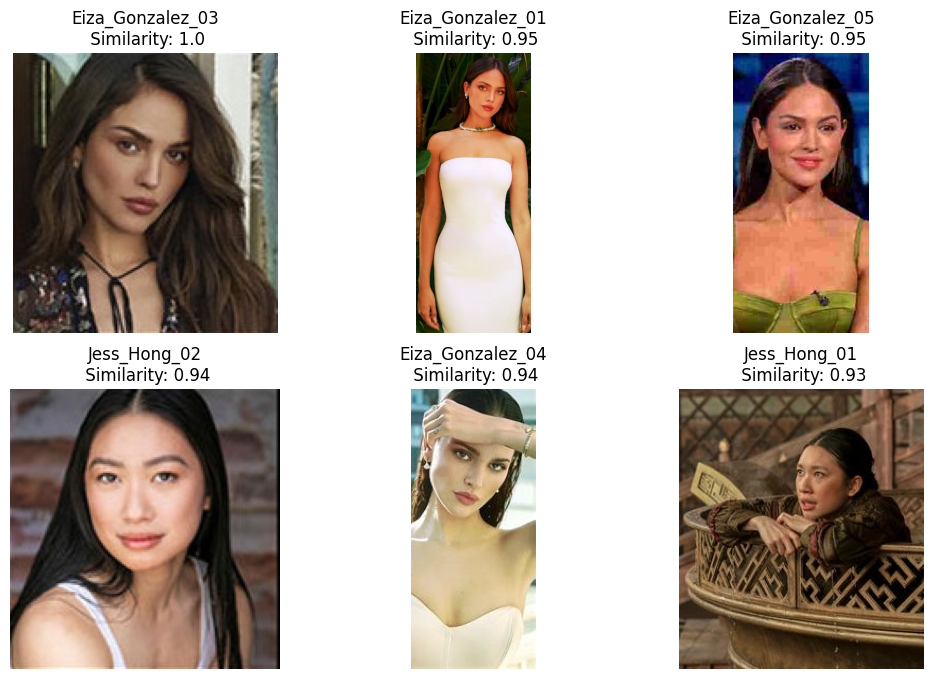

In [134]:
plt.figure(figsize=(12,8))

for i in range(len(image_results)):
    ax = plt.subplot(2,3,i+1)
    plt.title(
        image_results[i][0][9:-4]+'\n Similarity: '+str(round(image_results[i][1],2))
    )
    img = plt.imread(image_results[i][0])
    plt.imshow(img)
    plt.axis('off')

In [225]:
data_images = [
    'Eiza_Gonzalez_03.jpg',
    'Eiza_Gonzalez_01.jpg',
    'Eiza_Gonzalez_05.jpg',
    'Jess_Hong_02.jpg',
    'Eiza_Gonzalez_04.jpg',
    'Jess_Hong_01.jpg',
    'Alex_Sharp_02.jpg',
    'Liam_Cunningham_04.jpg',
    'Jess_Hong_03.jpg',
    'Eiza_Gonzalez_02.jpg',
    'Benedict_Wong_04.jpg',
    'John_Bradley_03.jpg',
    'Alex_Sharp_01.jpg',
    'John_Bradley_04.jpg',
    'Eiza_Gonzalez_02.jpg',
    'John_Bradley_01.jpg',
    'Liam_Cunningham_02.jpg',
    'John_Bradley_02.jpg',
    'Benedict_Wong_05.jpg',
    'Alex_Sharp_03.jpg',
    'Benedict_Wong_02.jpg',
    'Benedict_Wong_01.jpg',
    'Benedict_Wong_03.jpg',
    'Jovan_Adepo_01.jpg',
    'Liam_Cunningham_01.jpg',
    'Jovan_Adepo_02.jpg',
    'Liam_Cunningham_03.jpg'
]

distance_data = [
     0.000000,
     0.045388,
     0.046588,
     0.055280,
     0.063742,
     0.066402,
     0.084785,
     0.086134,
     0.086582,
     0.086979,
     0.088260,
     0.091857,
     0.104845,
     0.104869,
     0.104911,
     0.108680,
     0.111524,
     0.113892,
     0.125120,
     0.126874,
     0.127946,
     0.134841,
     0.145167,
     0.146045,
     0.151728,
     0.153202,
     0.157119
]

similarity_data = [
     1,
     0.954612,
     0.953412,
     0.94472,
     0.936258,
     0.933598,
     0.915215,
     0.913866,
     0.913418,
     0.913021,
     0.91174,
     0.908143,
     0.895155,
     0.895131,
     0.895089,
     0.89132,
     0.888476,
     0.886108,
     0.87488,
     0.8731260000000001,
     0.872054,
     0.865159,
     0.854833,
     0.853955,
     0.848272,
     0.8467979999999999,
     0.842881
]

result_7_df = pd.DataFrame({ 
    'Images': data_images, 
    'Distance': distance_data, 
    'Similarity': similarity_data  
}) 

result_7_df

Images  Distance  Similarity
0     Eiza_Gonzalez_03.jpg  0.000000    1.000000
1     Eiza_Gonzalez_01.jpg  0.045388    0.954612
2     Eiza_Gonzalez_05.jpg  0.046588    0.953412
3         Jess_Hong_02.jpg  0.055280    0.944720
4     Eiza_Gonzalez_04.jpg  0.063742    0.936258
5         Jess_Hong_01.jpg  0.066402    0.933598
6        Alex_Sharp_02.jpg  0.084785    0.915215
7   Liam_Cunningham_04.jpg  0.086134    0.913866
8         Jess_Hong_03.jpg  0.086582    0.913418
9     Eiza_Gonzalez_02.jpg  0.086979    0.913021
10    Benedict_Wong_04.jpg  0.088260    0.911740
11     John_Bradley_03.jpg  0.091857    0.908143
12       Alex_Sharp_01.jpg  0.104845    0.895155
13     John_Bradley_04.jpg  0.104869    0.895131
14    Eiza_Gonzalez_02.jpg  0.104911    0.895089
15     John_Bradley_01.jpg  0.108680    0.891320
16  Liam_Cunningham_02.jpg  0.111524    0.888476
17     John_Bradley_02.jpg  0.113892    0.886108
18    Benedict_Wong_05.jpg  0.125120    0.874880
19       Alex_Sharp_03.jpg  0.126874    0.873126
20    Benedict_Wong_02.jpg  0.127946    0.872054
21    Benedict_Wong_01.jpg  0.134841    0.865159
22    Benedict_Wong_03.jpg  0.145167    0.854833
23      Jovan_Adepo_01.jpg  0.146045    0.853955
24  Liam_Cunningham_01.jpg  0.151728    0.848272
25      Jovan_Adepo_02.jpg  0.153202    0.846798
26  Liam_Cunningham_03.jpg  0.157119    0.842881

<Axes: xlabel='Images'>

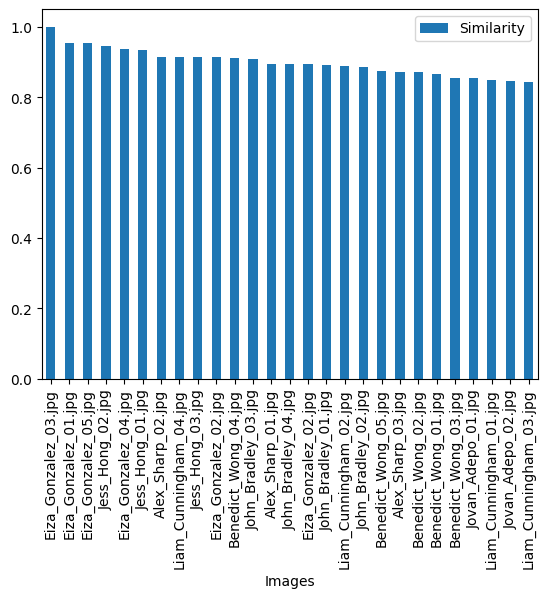

In [226]:
result_7_df.plot(x="Images", y="Similarity", kind="bar")

### VGG-Face / YOLOv8

* _vgg_face_weights.h5_ - `552.3 MB`
* _yolov8n-face.pt_ - `6.1 MB`
* _24-05-09 12:31:57_ - `Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore`
* _24-05-09 12:31:57_ - `find function duration 0.21353983879089355 seconds`

In [102]:
result8 = DeepFace.find(
    img_path = "assets/Eiza_Gonzalez_03.jpg",
    db_path = "assets",
    model_name = "VGG-Face",
    distance_metric = "cosine",
    enforce_detection = True,
    detector_backend = "yolov8",
    align = True,
    expand_percentage = 0,
    threshold = 0.90,
    normalization = "base",
    silent = False,
)

24-05-09 12:31:57 - Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore
24-05-09 12:31:57 - find function duration 0.21353983879089355 seconds


| # | identity | hash | target_x | target_y | target_w | target_h | source_x | source_y | source_w | source_h | threshold | distance |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | assets/Eiza_Gonzalez_03.jpg | c851bc623b011079548c899eedc96a0b8c1a9264 | 39 | 19 | 62 | 84 | 39 | 19 | 62 | 84 | 0.9 | -2.220446e-16 |
| 1 | assets/Eiza_Gonzalez_01.jpg | dd70311d238d2be8b47aee363e3f228b741c3b50 | 203 | 65 | 139 | 183 | 39 | 19 | 62 | 84 | 0.9 |  4.798819e-01 |
| 2 | assets/Eiza_Gonzalez_05.jpg | 4e3c950ef9084dd264e056711afd7a949dfb5f95 | 57 | 53 | 119 | 163 | 39 | 19 | 62 | 84 | 0.9 |  5.464998e-01 |
| 3 | assets/Eiza_Gonzalez_04.jpg | 863a9e1f9f06ff1da45ef39de64f03a24d768164 | 19 | 23 | 79 | 97 | 39 | 19 | 62 | 84 | 0.9 |  5.515515e-01 |
| 4 | assets/Eiza_Gonzalez_02.jpg | 220a99ec5380b5d4033dd18f6f54353a49bb341b | 497 | 132 | 192 | 252 | 39 | 19 | 62 | 84 | 0.9 |  7.510090e-01 |
| 5 | assets/John_Bradley_01.jpg | 7619cdf25b6b4071aa6ebd9408e001f372cee5bc | 99 | 114 | 198 | 282 | 39 | 19 | 62 | 84 | 0.9 |  8.351889e-01 |
| 6 | assets/Jess_Hong_02.jpg | 1233412de754501680ab281fdd0b3c0b7e634279 | 43 | 14 | 67 | 89 | 39 | 19 | 62 | 84 | 0.9 |  8.763548e-01 |
| 7 | assets/Jess_Hong_03.jpg | 9b056b12303c62eeee91c49456bdda7f494aa078 | 206 | 24 | 101 | 135 | 39 | 19 | 62 | 84 | 0.9 |  8.841409e-01 |
| 8 | assets/John_Bradley_03.jpg | 9686d791c5a87ff6060e721caf66f2532f92300a | 36 | 20 | 95 | 134 | 39 | 19 | 62 | 84 | 0.9 |  8.854007e-01 |
| 9 | assets/John_Bradley_04.jpg | d4c9635f2c37df80ade71f405b296ac98d68e690 | 31 | 60 | 166 | 214 | 39 | 19 | 62 | 84 | 0.9 |  8.909801e-01 |
| 10 | assets/Benedict_Wong_05.jpg | 4f14065c9065e745f63b1ca22c206649922eaee2 | 45 | 18 | 36 | 49 | 39 | 19 | 62 | 84 | 0.9 |  8.979046e-01 |

In [135]:
image_results = [
    ['./assets/Eiza_Gonzalez_03.jpg',  1.0000000000000002],
    ['./assets/Eiza_Gonzalez_01.jpg',  0.5201181],
    ['./assets/Eiza_Gonzalez_05.jpg',  0.4535002],
    ['./assets/Eiza_Gonzalez_04.jpg',  0.4484485],
    ['./assets/Eiza_Gonzalez_02.jpg',  0.24899099999999996],
    ['./assets/John_Bradley_01.jpg',  0.1648111]
]

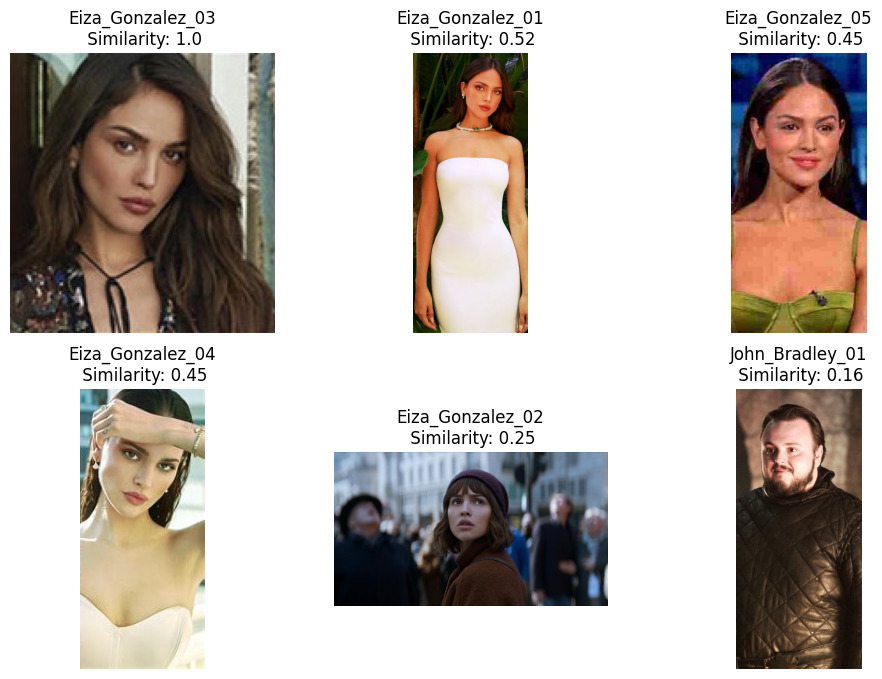

In [136]:
plt.figure(figsize=(12,8))

for i in range(len(image_results)):
    ax = plt.subplot(2,3,i+1)
    plt.title(
        image_results[i][0][9:-4]+'\n Similarity: '+str(round(image_results[i][1],2))
    )
    img = plt.imread(image_results[i][0])
    plt.imshow(img)
    plt.axis('off')

In [239]:
data_images = [
    'Eiza_Gonzalez_03.jpg',
    'Eiza_Gonzalez_01.jpg',
    'Eiza_Gonzalez_05.jpg',
    'Eiza_Gonzalez_04.jpg',
    'Eiza_Gonzalez_02.jpg',
    'John_Bradley_01.jpg',
    'Jess_Hong_02.jpg',
    'Jess_Hong_03.jpg',
    'John_Bradley_03.jpg',
    'John_Bradley_04.jpg',
    'Benedict_Wong_05.jpg'
]

distance_data = [
     -2.220446e-16,
     4.798819e-01,
     5.464998e-01,
     5.515515e-01,
     7.510090e-01,
     8.351889e-01,
     8.763548e-01,
     8.841409e-01,
     8.854007e-01,
     8.909801e-01,
     8.979046e-01
]

similarity_data = [
     1.0000000000000002,
     0.5201181,
     0.4535002,
     0.4484485,
     0.24899099999999996,
     0.1648111,
     0.12364520000000001,
     0.11585909999999999,
     0.11459929999999996,
     0.10901989999999995,
     0.10209539999999995
]

result_8_df = pd.DataFrame({ 
    'Images': data_images, 
    'Distance': distance_data, 
    'Similarity': similarity_data  
}) Facenet512 / YOLOv8

result_8_df

Images      Distance  Similarity
0   Eiza_Gonzalez_03.jpg -2.220446e-16    1.000000
1   Eiza_Gonzalez_01.jpg  4.798819e-01    0.520118
2   Eiza_Gonzalez_05.jpg  5.464998e-01    0.453500
3   Eiza_Gonzalez_04.jpg  5.515515e-01    0.448449
4   Eiza_Gonzalez_02.jpg  7.510090e-01    0.248991
5    John_Bradley_01.jpg  8.351889e-01    0.164811
6       Jess_Hong_02.jpg  8.763548e-01    0.123645
7       Jess_Hong_03.jpg  8.841409e-01    0.115859
8    John_Bradley_03.jpg  8.854007e-01    0.114599
9    John_Bradley_04.jpg  8.909801e-01    0.109020
10  Benedict_Wong_05.jpg  8.979046e-01    0.102095

<Axes: xlabel='Images'>

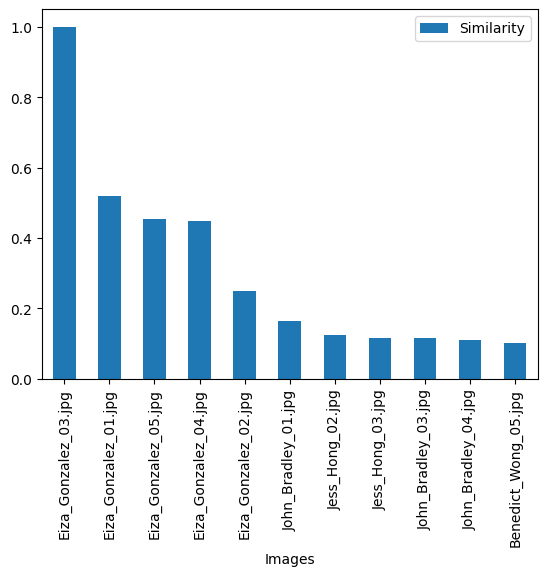

In [240]:
result_8_df.plot(x="Images", y="Similarity", kind="bar")

### Facenet512 / YOLOv8

* _facenet512_weights.h5_ - `90.6 MB`
* _yolov8n-face.pt_ - `6.1 MB`
* _24-05-10 06:14:06_ - `Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore`
* _24-05-10 06:14:07_ - `find function duration 0.1690361499786377 seconds`

In [10]:
result9 = DeepFace.find(
    img_path = "assets/Eiza_Gonzalez_03.jpg",
    db_path = "assets",
    model_name = "Facenet512",
    distance_metric = "cosine",
    enforce_detection = True,
    detector_backend = "yolov8",
    align = True,
    expand_percentage = 0,
    threshold = 0.90,
    normalization = "base",
    silent = False,
)

24-05-13 04:09:56 - Searching assets/Eiza_Gonzalez_03.jpg in 29 length datastore
24-05-13 04:10:04 - find function duration 7.9978954792022705 seconds


| # | identity | hash | target_x | target_y | target_w | target_h | source_x | source_y | source_w | source_h | threshold | distance |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | assets/Eiza_Gonzalez_03.jpg | c851bc623b011079548c899eedc96a0b8c1a9264 |39 | 19 | 62 | 84 | 39 | 19 | 62 | 84 | 0.9 | 4.440892e-16 |
| 1 | assets/Eiza_Gonzalez_01.jpg | dd70311d238d2be8b47aee363e3f228b741c3b50 |203 | 65 | 139 | 183 | 39 | 19 | 62 | 84 | 0.9 | 2.783114e-01 |
| 2 | assets/Eiza_Gonzalez_04.jpg | 863a9e1f9f06ff1da45ef39de64f03a24d768164 |19 | 23 | 79 | 97 | 39 | 19 | 62 | 84 | 0.9 | 3.291848e-01 |
| 3 | assets/Eiza_Gonzalez_05.jpg | 4e3c950ef9084dd264e056711afd7a949dfb5f95 |57 | 53 | 119 | 163 | 39 | 19 | 62 | 84 | 0.9 | 3.929502e-01 |
| 4 | assets/Eiza_Gonzalez_02.jpg | 220a99ec5380b5d4033dd18f6f54353a49bb341b |497 | 132 | 192 | 252 | 39 | 19 | 62 | 84 | 0.9 | 4.768916e-01 |
| 5 | assets/Jovan_Adepo_01.jpg | 47bc06e224a2538aa258c0b5d03f478e5713b8bc |46 | 16 | 64 | 92 | 39 | 19 | 62 | 84 | 0.9 | 7.567952e-01 |
| 6 | assets/Jess_Hong_02.jpg | 1233412de754501680ab281fdd0b3c0b7e634279 |43 | 14 | 67 | 89 | 39 | 19 | 62 | 84 | 0.9 | 8.551544e-01 |
| 7 | assets/Benedict_Wong_04.jpg | dbb025ab8039915335d84700c6423fadfa91c5b3 |19 | 31 | 52 | 74 | 39 | 19 | 62 | 84 | 0.9 | 8.763277e-01 |
| 8 | assets/Jovan_Adepo_02.jpg | f5428170e3323a333121ceb196675526d8ad02c6 |63 | 59 | 117 | 169 | 39 | 19 | 62 | 84 | 0.9 | 8.765136e-01 |
| 9 | assets/Alex_Sharp_03.jpg | 48a617ed38787e3dd5e7d7e87e2a56b37214ce38 |110 | 111 | 248 | 345 | 39 | 19 | 62 | 84 | 0.9 | 8.860148e-01 |
| 10 | assets/John_Bradley_03.jpg | 9686d791c5a87ff6060e721caf66f2532f92300a |36 | 20 | 95 | 134 | 39 | 19 | 62 | 84 | 0.9 | 8.862074e-01 |
| 11 | assets/Liam_Cunningham_03.jpg | d349c11690daa1a9e118df5d4ae08d554852a96a |118 | 58 | 130 | 184 | 39 | 19 | 62 | 84 | 0.9 | 8.896595e-01 |
| 12 | assets/John_Bradley_02.jpg | 7f0317379f612eb44096207202e3cc91e441a58e |119 | 62 | 55 | 75 | 39 | 19 | 62 | 84 | 0.9 | 8.998877e-01 |

In [137]:
image_results = [
    ['./assets/Eiza_Gonzalez_03.jpg',  0.9999999999999996],
    ['./assets/Eiza_Gonzalez_01.jpg',  0.7216886],
    ['./assets/Eiza_Gonzalez_04.jpg',  0.6708152000000001],
    ['./assets/Eiza_Gonzalez_05.jpg',  0.6070498],
    ['./assets/Eiza_Gonzalez_02.jpg',  0.5231083999999999],
    ['./assets/Jovan_Adepo_01.jpg',  0.2432048]
]

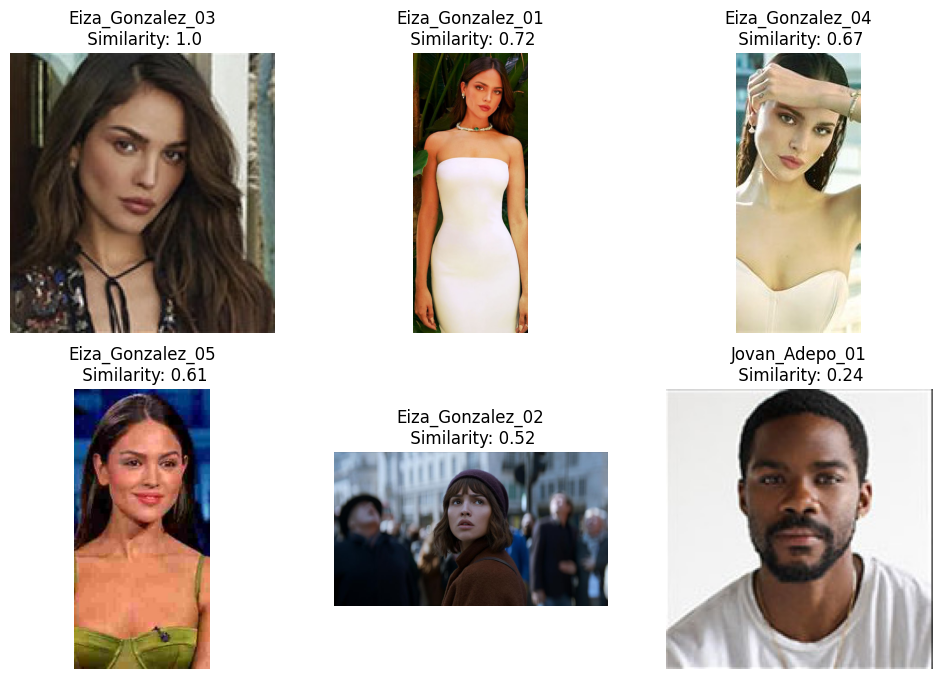

In [138]:
plt.figure(figsize=(12,8))

for i in range(len(image_results)):
    ax = plt.subplot(2,3,i+1)
    plt.title(
        image_results[i][0][9:-4]+'\n Similarity: '+str(round(image_results[i][1],2))
    )
    img = plt.imread(image_results[i][0])
    plt.imshow(img)
    plt.axis('off')

In [33]:
data_images = [
    'Eiza_Gonzalez_03.jpg',
    'Eiza_Gonzalez_01.jpg',
    'Eiza_Gonzalez_04.jpg',
    'Eiza_Gonzalez_05.jpg',
    'Eiza_Gonzalez_02.jpg',
    'Jovan_Adepo_01.jpg',
    'Jess_Hong_02.jpg',
    'Benedict_Wong_04.jpg',
    'Jovan_Adepo_02.jpg',
    'Alex_Sharp_03.jpg',
    'John_Bradley_03.jpg',
    'Liam_Cunningham_03.jpg',
    'John_Bradley_02.jpg'
]

distance_data = [
     4.440892e-16,
     2.783114e-01,
     3.291848e-01,
     3.929502e-01,
     4.768916e-01,
     7.567952e-01,
     8.551544e-01,
     8.763277e-01,
     8.765136e-01,
     8.860148e-01,
     8.862074e-01,
     8.896595e-01,
     8.998877e-01,
]

similarity_data = [
     0.9999999999999996,
     0.7216886,
     0.6708152000000001,
     0.6070498,
     0.5231083999999999,
     0.2432048,
     0.14484560000000002,
     0.12367229999999996,
     0.1234864,
     0.11398520000000001,
     0.11379260000000002,
     0.11034049999999995,
     0.10011230000000004
]

result_9_df = pd.DataFrame({ 
    'Images': data_images, 
    'Distance': distance_data, 
    'Similarity': similarity_data  
}) 

result_9_df

Images      Distance  Similarity
0     Eiza_Gonzalez_03.jpg  4.440892e-16    1.000000
1     Eiza_Gonzalez_01.jpg  2.783114e-01    0.721689
2     Eiza_Gonzalez_04.jpg  3.291848e-01    0.670815
3     Eiza_Gonzalez_05.jpg  3.929502e-01    0.607050
4     Eiza_Gonzalez_02.jpg  4.768916e-01    0.523108
5       Jovan_Adepo_01.jpg  7.567952e-01    0.243205
6         Jess_Hong_02.jpg  8.551544e-01    0.144846
7     Benedict_Wong_04.jpg  8.763277e-01    0.123672
8       Jovan_Adepo_02.jpg  8.765136e-01    0.123486
9        Alex_Sharp_03.jpg  8.860148e-01    0.113985
10     John_Bradley_03.jpg  8.862074e-01    0.113793
11  Liam_Cunningham_03.jpg  8.896595e-01    0.110340
12     John_Bradley_02.jpg  8.998877e-01    0.100112

<Axes: xlabel='Images'>

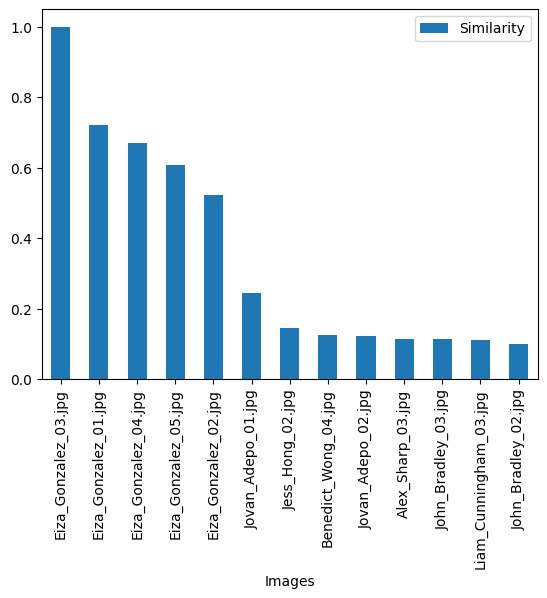

In [34]:
result_9_df.plot(x="Images", y="Similarity", kind="bar")

### Facenet / YOLOv8

* _facenet_weights.h5_ - `87.9 MB`
* _yolov8n-face.pt_ - `6.1 MB`
* _24-05-10 06:31:52_ - `Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore`
* _24-05-10 06:31:53_ - `find function duration 0.1595611572265625 seconds`

In [36]:
result10 = DeepFace.find(
    img_path = "assets/Eiza_Gonzalez_03.jpg",
    db_path = "assets",
    model_name = "Facenet",
    distance_metric = "cosine",
    enforce_detection = True,
    detector_backend = "yolov8",
    align = True,
    expand_percentage = 0,
    threshold = 0.90,
    normalization = "base",
    silent = False,
)

24-05-10 06:31:52 - Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore
24-05-10 06:31:53 - find function duration 0.1595611572265625 seconds


| # | identity | hash | target_x | target_y | target_w | target_h | source_x | source_y | source_w | source_h | threshold | distance |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | assets/Eiza_Gonzalez_03.jpg | c851bc623b011079548c899eedc96a0b8c1a9264 | 39 | 19 | 62 | 84 | 39 | 19 | 62 | 84 | 0.9 | -2.220446e-16 |
| 1 | assets/Eiza_Gonzalez_01.jpg | dd70311d238d2be8b47aee363e3f228b741c3b50 | 203 | 65 | 139 | 183 | 39 | 19 | 62 | 84 | 0.9 |  1.577659e-01 |
| 2 | assets/Eiza_Gonzalez_05.jpg | 4e3c950ef9084dd264e056711afd7a949dfb5f95 | 57 | 53 | 119 | 163 | 39 | 19 | 62 | 84 | 0.9 |  3.097999e-01 |
| 3 | assets/Eiza_Gonzalez_04.jpg | 863a9e1f9f06ff1da45ef39de64f03a24d768164 | 19 | 23 | 79 | 97 | 39 | 19 | 62 | 84 | 0.9 |  4.673658e-01 |
| 4 | assets/Eiza_Gonzalez_02.jpg | 220a99ec5380b5d4033dd18f6f54353a49bb341b | 497 | 132 | 192 | 252 | 39 | 19 | 62 | 84 | 0.9 |  7.133165e-01 |
| 5 | assets/Benedict_Wong_05.jpg | 4f14065c9065e745f63b1ca22c206649922eaee2 | 45 | 18 | 36 | 49 | 39 | 19 | 62 | 84 | 0.9 |  8.396030e-01 |
| 6 | assets/Liam_Cunningham_01.jpg | a157a9143b88b9844ea65f1ccea484a337670853 | 137 | 163 | 231 | 319 | 39 | 19 | 62 | 84 | 0.9 |  8.708137e-01 |
| 7 | assets/Jovan_Adepo_01.jpg | 47bc06e224a2538aa258c0b5d03f478e5713b8bc | 46 | 16 | 64 | 92 | 39 | 19 | 62 | 84 | 0.9 |  8.942636e-01 |
| 8 | assets/Liam_Cunningham_03.jpg | d349c11690daa1a9e118df5d4ae08d554852a96a | 118 | 58 | 130 | 184 | 39 | 19 | 62 | 84 | 0.9 |  8.980692e-01 |

In [141]:
image_results = [
    ['./assets/Eiza_Gonzalez_03.jpg',  1.0000000000000002],
    ['./assets/Eiza_Gonzalez_01.jpg',  0.8422341],
    ['./assets/Eiza_Gonzalez_05.jpg',  0.6902001],
    ['./assets/Eiza_Gonzalez_04.jpg',  0.5326342],
    ['./assets/Eiza_Gonzalez_02.jpg',  0.2866835],
    ['./assets/Benedict_Wong_05.jpg',  0.160397]
]

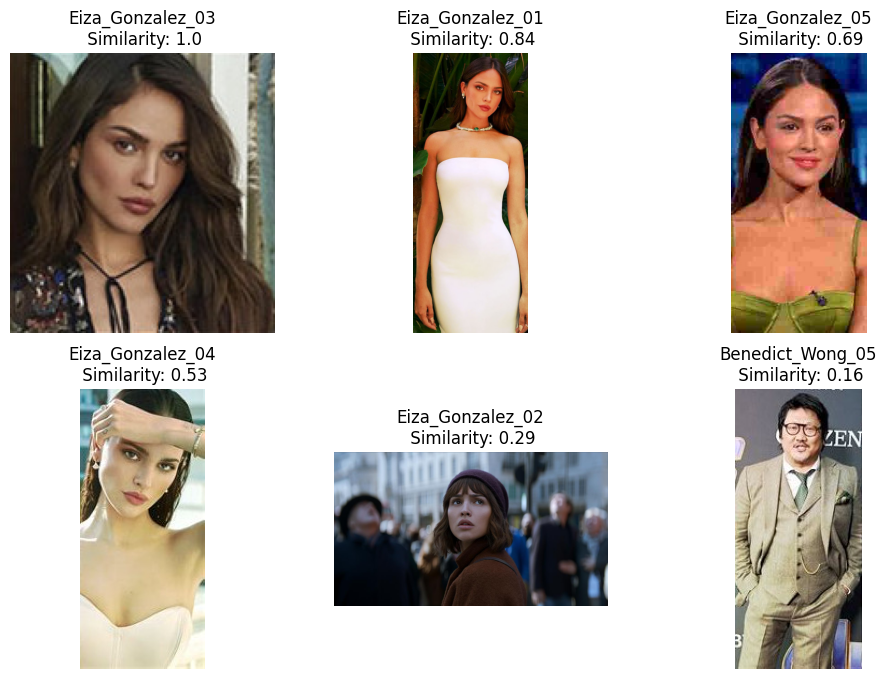

In [142]:
plt.figure(figsize=(12,8))

for i in range(len(image_results)):
    ax = plt.subplot(2,3,i+1)
    plt.title(
        image_results[i][0][9:-4]+'\n Similarity: '+str(round(image_results[i][1],2))
    )
    img = plt.imread(image_results[i][0])
    plt.imshow(img)
    plt.axis('off')

In [53]:
data_images = [
    'Eiza_Gonzalez_03.jpg',
    'Eiza_Gonzalez_01.jpg',
    'Eiza_Gonzalez_05.jpg',
    'Eiza_Gonzalez_04.jpg',
    'Eiza_Gonzalez_02.jpg',
    'Benedict_Wong_05.jpg',
    'Liam_Cunningham_01.jpg',
    'Jovan_Adepo_01.jpg',
    'Liam_Cunningham_03.jpg'
]

distance_data = [
     -2.220446e-16,
     1.577659e-01,
     3.097999e-01,
     4.673658e-01,
     7.133165e-01,
     8.396030e-01,
     8.708137e-01,
     8.942636e-01,
     8.980692e-01
]

similarity_data = [
     1.0000000000000002,
     0.8422341,
     0.6902001,
     0.5326342,
     0.2866835,
     0.160397,
     0.12918629999999998,
     0.10573639999999995,
     0.10193079999999999
]

result_10_df = pd.DataFrame({ 
    'Images': data_images, 
    'Distance': distance_data, 
    'Similarity': similarity_data  
}) 

result_10_df

Images      Distance  Similarity
0    Eiza_Gonzalez_03.jpg -2.220446e-16    1.000000
1    Eiza_Gonzalez_01.jpg  1.577659e-01    0.842234
2    Eiza_Gonzalez_05.jpg  3.097999e-01    0.690200
3    Eiza_Gonzalez_04.jpg  4.673658e-01    0.532634
4    Eiza_Gonzalez_02.jpg  7.133165e-01    0.286683
5    Benedict_Wong_05.jpg  8.396030e-01    0.160397
6  Liam_Cunningham_01.jpg  8.708137e-01    0.129186
7      Jovan_Adepo_01.jpg  8.942636e-01    0.105736
8  Liam_Cunningham_03.jpg  8.980692e-01    0.101931

<Axes: xlabel='Images'>

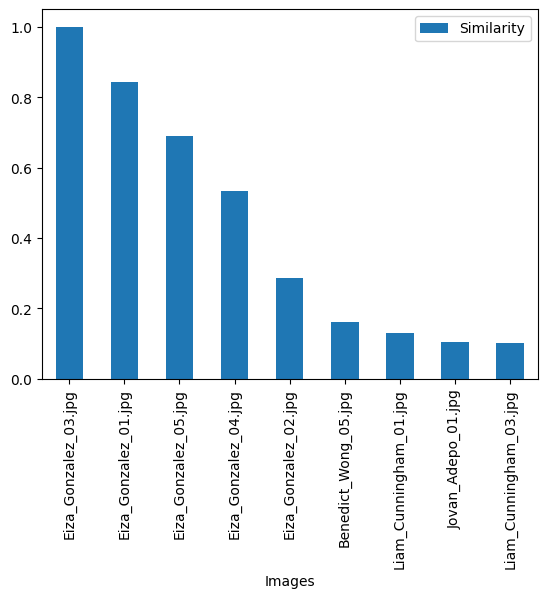

In [54]:
result_10_df.plot(x="Images", y="Similarity", kind="bar")

### ArcFace / YOLOv8

* _arcface_weights.h5_ - `130.7 MB`
* _yolov8n-face.pt_ - `6.1 MB`
* _24-05-10 06:51:33_ - `Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore`
* _24-05-10 06:51:34_ - `Find function duration 0.14449524879455566 seconds` 

In [51]:
result11 = DeepFace.find(
    img_path = "assets/Eiza_Gonzalez_03.jpg",
    db_path = "assets",
    model_name = "ArcFace",
    distance_metric = "cosine",
    enforce_detection = True,
    detector_backend = "yolov8",
    align = True,
    expand_percentage = 0,
    threshold = 0.90,
    normalization = "base",
    silent = False,
)

24-05-10 06:59:27 - Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore
24-05-10 06:59:27 - find function duration 0.14449524879455566 seconds


| # | identity | hash | target_x | target_y | target_w | target_h | source_x | source_y | source_w | source_h | threshold | distance |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | assets/Eiza_Gonzalez_03.jpg | c851bc623b011079548c899eedc96a0b8c1a9264 | 39 | 19 | 62 | 84 | 39 | 19 | 62 | 84 | 0.9 | 0.000000 |
| 1 | assets/Eiza_Gonzalez_01.jpg | dd70311d238d2be8b47aee363e3f228b741c3b50 | 203 | 65 | 139 | 183 | 39 | 19 | 62 | 84 | 0.9 | 0.491314 |
| 2 | assets/Eiza_Gonzalez_04.jpg | 863a9e1f9f06ff1da45ef39de64f03a24d768164 | 19 | 23 | 79 | 97 | 39 | 19 | 62 | 84 | 0.9 | 0.534116 |
| 3 | assets/Eiza_Gonzalez_05.jpg | 4e3c950ef9084dd264e056711afd7a949dfb5f95 | 57 | 53 | 119 | 163 | 39 | 19 | 62 | 84 | 0.9 | 0.597161 |
| 4 | assets/Eiza_Gonzalez_02.jpg | 220a99ec5380b5d4033dd18f6f54353a49bb341b | 497 | 132 | 192 | 252 | 39 | 19 | 62 | 84 | 0.9 | 0.784296 |
| 5 | assets/Alex_Sharp_03.jpg | 48a617ed38787e3dd5e7d7e87e2a56b37214ce38 | 110 | 111 | 248 | 345 | 39 | 19 | 62 | 84 | 0.9 | 0.828761 |
| 6 | assets/Jovan_Adepo_01.jpg | 47bc06e224a2538aa258c0b5d03f478e5713b8bc | 46 | 16 | 64 | 92 | 39 | 19 | 62 | 84 | 0.9 | 0.858612 |
| 7 | assets/Jovan_Adepo_02.jpg | f5428170e3323a333121ceb196675526d8ad02c6 | 63 | 59 | 117 | 169 | 39 | 19 | 62 | 84 | 0.9 | 0.866306 |
| 8 | assets/Alex_Sharp_01.jpg | 7155ec0a507fd98583c179beb164c9fcfa0fa917 | 207 | 42 | 93 | 123 | 39 | 19 | 62 | 84 | 0.9 | 0.887515 |

In [143]:
image_results = [
    ['./assets/Eiza_Gonzalez_03.jpg',  1.000000000000000],
    ['./assets/Eiza_Gonzalez_01.jpg',  0.508686],
    ['./assets/Eiza_Gonzalez_04.jpg',  0.46588399999999996],
    ['./assets/Eiza_Gonzalez_05.jpg',  0.40283899999999995],
    ['./assets/Eiza_Gonzalez_02.jpg',  0.215704],
    ['./assets/Alex_Sharp_03.jpg',  0.17123900000000003]
]

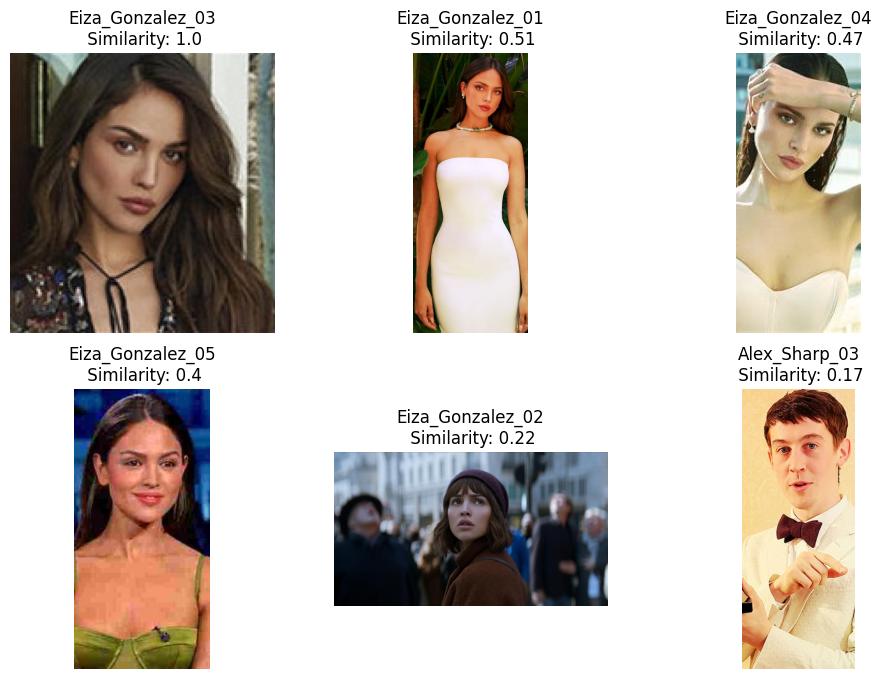

In [144]:
plt.figure(figsize=(12,8))

for i in range(len(image_results)):
    ax = plt.subplot(2,3,i+1)
    plt.title(
        image_results[i][0][9:-4]+'\n Similarity: '+str(round(image_results[i][1],2))
    )
    img = plt.imread(image_results[i][0])
    plt.imshow(img)
    plt.axis('off')

In [64]:
data_images = [
    'Eiza_Gonzalez_03.jpg',
    'Eiza_Gonzalez_01.jpg',
    'Eiza_Gonzalez_04.jpg',
    'Eiza_Gonzalez_05.jpg',
    'Eiza_Gonzalez_02.jpg',
    'Alex_Sharp_03.jpg',
    'Jovan_Adepo_01.jpg',
    'Jovan_Adepo_02.jpg',
    'Alex_Sharp_01.jpg'
]

distance_data = [
     0.000000,
     0.491314,
     0.534116,
     0.597161,
     0.784296,
     0.828761,
     0.858612,
     0.866306,
     0.887515
]

similarity_data = [
     1.0,
     0.508686,
     0.46588399999999996,
     0.40283899999999995,
     0.215704,
     0.17123900000000003,
     0.14138799999999996,
     0.13369399999999998,
     0.11248499999999995
]

result_11_df = pd.DataFrame({ 
    'Images': data_images, 
    'Distance': distance_data, 
    'Similarity': similarity_data  
}) 

result_11_df

Images  Distance  Similarity
0  Eiza_Gonzalez_03.jpg  0.000000    1.000000
1  Eiza_Gonzalez_01.jpg  0.491314    0.508686
2  Eiza_Gonzalez_04.jpg  0.534116    0.465884
3  Eiza_Gonzalez_05.jpg  0.597161    0.402839
4  Eiza_Gonzalez_02.jpg  0.784296    0.215704
5     Alex_Sharp_03.jpg  0.828761    0.171239
6    Jovan_Adepo_01.jpg  0.858612    0.141388
7    Jovan_Adepo_02.jpg  0.866306    0.133694
8     Alex_Sharp_01.jpg  0.887515    0.112485

<Axes: xlabel='Images'>

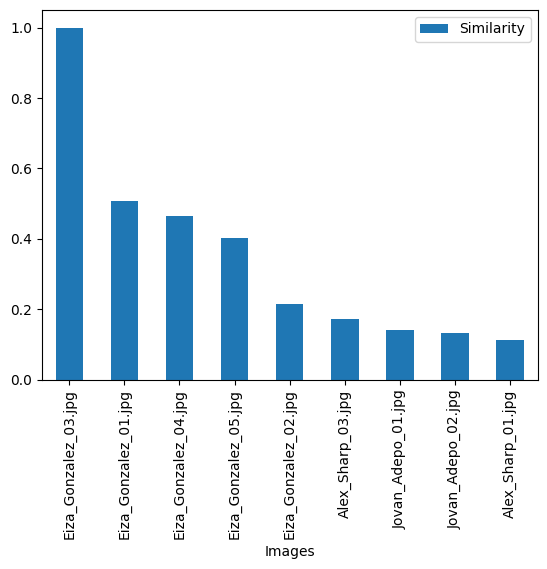

In [65]:
result_11_df.plot(x="Images", y="Similarity", kind="bar")

### GhostFaceNet / YOLOv8

* _GhostFaceNet_W1.3_S1_ArcFace.h5_ - `16.5 MB`
* _yolov8n-face.pt_ - `6.1 MB`
* _24-05-10 07:47:47_ - `Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore`
* _24-05-10 07:47:47_ - `Find function duration 0.16495823860168457 seconds` 

In [71]:
result12 = DeepFace.find(
    img_path = "assets/Eiza_Gonzalez_03.jpg",
    db_path = "assets",
    model_name = "GhostFaceNet",
    distance_metric = "cosine",
    enforce_detection = True,
    detector_backend = "yolov8",
    align = True,
    expand_percentage = 0,
    threshold = 0.90,
    normalization = "base",
    silent = False,
)

24-05-10 07:47:47 - Searching assets/Eiza_Gonzalez_03.jpg in 27 length datastore
24-05-10 07:47:47 - find function duration 0.16495823860168457 seconds


| # | identity | hash | target_x | target_y | target_w | target_h | source_x | source_y | source_w | source_h | threshold | distance |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | assets/Eiza_Gonzalez_03.jpg | c851bc623b011079548c899eedc96a0b8c1a9264 | 39 | 19 | 62 | 84 | 39 | 19 | 62 | 84 | 0.9 | 0.000000 |
| 1 | assets/Eiza_Gonzalez_01.jpg | dd70311d238d2be8b47aee363e3f228b741c3b50 | 203 | 65 | 139 | 183 | 39 | 19 | 62 | 84 | 0.9 | 0.588340 |
| 2 | assets/Eiza_Gonzalez_05.jpg | 4e3c950ef9084dd264e056711afd7a949dfb5f95 | 57 | 53 | 119 | 163 | 39 | 19 | 62 | 84 | 0.9 | 0.713904 |
| 3 | assets/Jess_Hong_02.jpg | 1233412de754501680ab281fdd0b3c0b7e634279 | 43 | 14 | 67 | 89 | 39 | 19 | 62 | 84 | 0.9 | 0.799567 |
| 4 | assets/Eiza_Gonzalez_04.jpg | 863a9e1f9f06ff1da45ef39de64f03a24d768164 | 19 | 23 | 79 | 97 | 39 | 19 | 62 | 84 | 0.9 | 0.814843 |
| 5 | assets/Jess_Hong_03.jpg | 9b056b12303c62eeee91c49456bdda7f494aa078 | 206 | 24 | 101 | 135 | 39 | 19 | 62 | 84 | 0.9 | 0.857111 |
| 6 | assets/Benedict_Wong_05.jpg | 4f14065c9065e745f63b1ca22c206649922eaee2 | 45 | 18 | 36 | 49 | 39 | 19 | 62 | 84 | 0.9 | 0.861572 |
| 7 | assets/Eiza_Gonzalez_02.jpg | 220a99ec5380b5d4033dd18f6f54353a49bb341b | 497 | 132 | 192 | 252 | 39 | 19 | 62 | 84 | 0.9 | 0.890497 |

In [145]:
image_results = [
    ['./assets/Eiza_Gonzalez_03.jpg',  1.000000000000000],
    ['./assets/Eiza_Gonzalez_01.jpg',  0.41166],
    ['./assets/Eiza_Gonzalez_05.jpg',  0.286096],
    ['./assets/Jess_Hong_02.jpg',  0.20043299999999997],
    ['./assets/Eiza_Gonzalez_04.jpg',  0.18515700000000002],
    ['./assets/Jess_Hong_03.jpg',  0.14288900000000004]
]

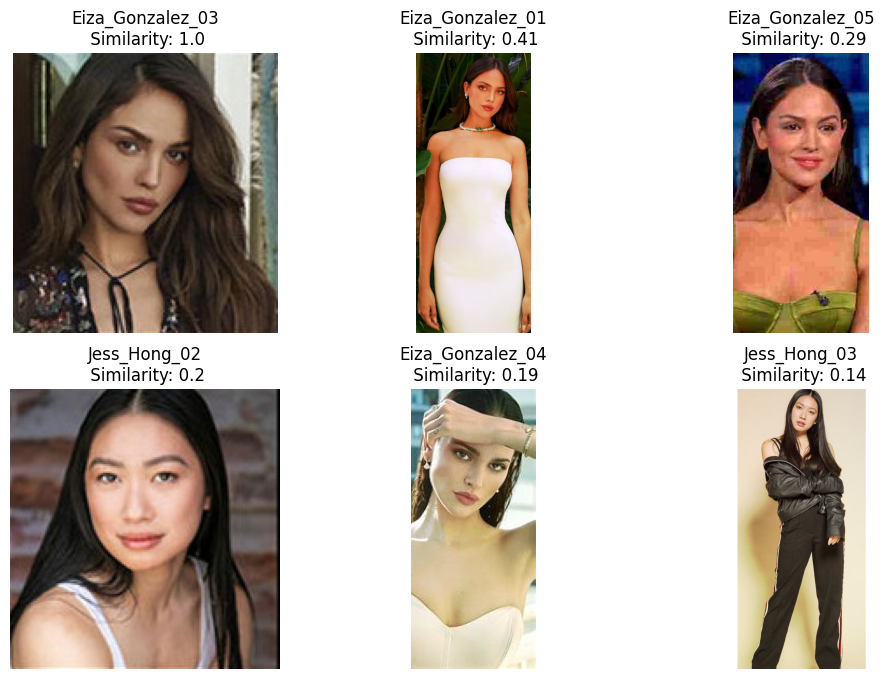

In [146]:
plt.figure(figsize=(12,8))

for i in range(len(image_results)):
    ax = plt.subplot(2,3,i+1)
    plt.title(
        image_results[i][0][9:-4]+'\n Similarity: '+str(round(image_results[i][1],2))
    )
    img = plt.imread(image_results[i][0])
    plt.imshow(img)
    plt.axis('off')

In [83]:
data_images = [
    'Eiza_Gonzalez_03.jpg',
    'Eiza_Gonzalez_01.jpg',
    'Eiza_Gonzalez_05.jpg',
    'Jess_Hong_02.jpg',
    'Eiza_Gonzalez_04.jpg',
    'Jess_Hong_03.jpg',
    'Benedict_Wong_05.jpg',
    'Eiza_Gonzalez_02.jpg'
]

distance_data = [
     0.000000,
     0.588340,
     0.713904,
     0.799567,
     0.814843,
     0.857111,
     0.861572,
     0.890497
]

similarity_data = [
     1.0,
     0.41166,
     0.286096,
     0.20043299999999997,
     0.18515700000000002,
     0.14288900000000004,
     0.138428,
     0.10950300000000002
]

result_12_df = pd.DataFrame({ 
    'Images': data_images, 
    'Distance': distance_data, 
    'Similarity': similarity_data  
}) 

result_12_df

Images  Distance  Similarity
0  Eiza_Gonzalez_03.jpg  0.000000    1.000000
1  Eiza_Gonzalez_01.jpg  0.588340    0.411660
2  Eiza_Gonzalez_05.jpg  0.713904    0.286096
3      Jess_Hong_02.jpg  0.799567    0.200433
4  Eiza_Gonzalez_04.jpg  0.814843    0.185157
5      Jess_Hong_03.jpg  0.857111    0.142889
6  Benedict_Wong_05.jpg  0.861572    0.138428
7  Eiza_Gonzalez_02.jpg  0.890497    0.109503

<Axes: xlabel='Images'>

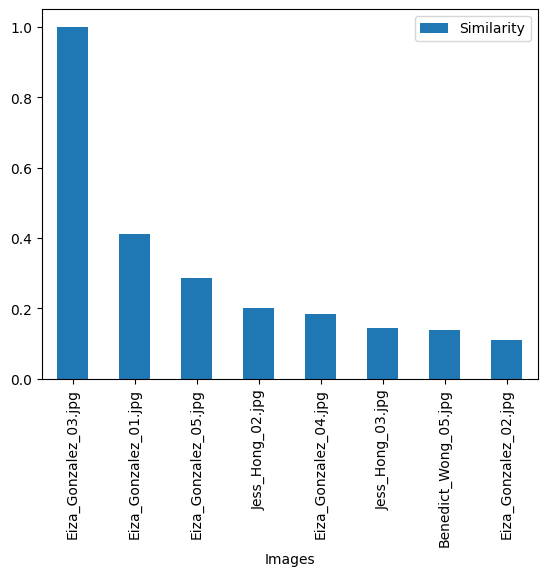

In [84]:
result_12_df.plot(x="Images", y="Similarity", kind="bar")

## Face Analysis

* _facial_expression_model_weights.h5_ - `5.7 MB`
* _age_model_weights.h5_ - `513.8 MB`
* _gender_model_weights.h5_ - `512.3 MB`
* _race_model_single_batch.h5_ - `512.3 MB`

In [11]:
result13 = DeepFace.analyze(
    img_path = "assets/Benedict_Wong_03.jpg", 
    actions = ["emotion", "age", "gender", "race"],
    enforce_detection = True,
    detector_backend = "yolov8",
    align = True,
    expand_percentage = 0,
    silent = False,
)

Action: race: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  8.05it/s]


In [14]:
def pretty_print2(result):
    print(f"Emotions: angry {result[0]['emotion']['angry']}, disgust {result[0]['emotion']['disgust']}, fear {result[0]['emotion']['fear']}, happy {result[0]['emotion']['happy']}, sad {result[0]['emotion']['sad']}, surprise {result[0]['emotion']['surprise']}, neutral {result[0]['emotion']['neutral']}\nDominant Emotion: {result[0]['dominant_emotion']},\nConfidence: {result[0]['face_confidence']},\nAge: {result[0]['age']},\nFemale: {result[0]['gender']['Woman']},\nMale: {result[0]['gender']['Man']},\nDominant Gender: {result[0]['dominant_gender']},\nAsian: {result[0]['race']['asian']},\nIndian: {result[0]['race']['indian']},\nBlack: {result[0]['race']['black']},\nWhite: {result[0]['race']['white']},\nMiddle Eastern: {result[0]['race']['middle eastern']},\nLatino Hispanic: {result[0]['race']['latino hispanic']},\nDominant Race: {result[0]['dominant_race']},\nDetections :: x,y,w,h,left_eye,right_eye\n    Regions: {result[0]['region']['x']},{result[0]['region']['y']},{result[0]['region']['w']},{result[0]['region']['h']},{result[0]['region']['left_eye']},{result[0]['region']['right_eye']}")

In [12]:
pretty_print2(result13)

Emotions: angry 52.47458815574646, disgust 1.6047310500973637e-14, fear 1.1184778797579398e-08, happy 0.8838735520839691, sad 0.002243508606625255, surprise 1.661406301423085e-06, neutral 46.63929641246796
Dominant Emotion: angry,
Confidence: 0.87,
Age: 44,
Female: 0.08514390792697668,
Male: 99.91486072540283,
Dominant Gender: Man,
Asian: 99.96744990154802,
Indian: 0.020422336582121944,
Black: 3.538733961399402e-07,
White: 0.0007214643549394969,
Middle Eastern: 9.568194723961802e-09,
Latino Hispanic: 0.011405441862250006,
Dominant Race: asian,
Detections :: x,y,w,h,left_eye,right_eye
    Regions: 89,84,130,173,(183, 149),(125, 146)


In [9]:
result14 = DeepFace.analyze(
    img_path = "assets/Eiza_Gonzalez_03.jpg", 
    actions = ["emotion", "age", "gender", "race"],
    enforce_detection = True,
    detector_backend = "yolov8",
    align = True,
    expand_percentage = 0,
    silent = False,
)

Action: race: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.62it/s]


In [10]:
pretty_print2(result14)

Emotions: angry 61.89677715301514, disgust 0.0003831427875411464, fear 17.56562739610672, happy 0.024294608738273382, sad 7.415241003036499, surprise 0.0922270177397877, neutral 13.00545483827591
Dominant Emotion: angry,
Confidence: 0.83,
Age: 27,
Female: 99.99103546142578,
Male: 0.008965710730990395,
Dominant Gender: Woman,
Asian: 1.2231661533613387,
Indian: 1.5839036579613277,
Black: 0.15020265171857497,
White: 51.279270801457265,
Middle Eastern: 18.619856967908973,
Latino Hispanic: 27.143603818846206,
Dominant Race: white,
Detections :: x,y,w,h,left_eye,right_eye
    Regions: 39,19,62,84,(91, 57),(66, 52)


In [12]:
result15 = DeepFace.analyze(
    img_path = "assets/Jovan_Adepo_01.jpg", 
    actions = ["emotion", "age", "gender", "race"],
    enforce_detection = True,
    detector_backend = "yolov8",
    align = True,
    expand_percentage = 0,
    silent = False,
)

Action: race: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.43s/it]


In [15]:
pretty_print2(result15)

Emotions: angry 0.043431183439679444, disgust 1.5149926940131314e-11, fear 0.0003094855173912947, happy 4.4355454065225786e-05, sad 0.051101919962093234, surprise 2.526942033398427e-06, neutral 99.90511536598206
Dominant Emotion: neutral,
Confidence: 0.86,
Age: 35,
Female: 0.016746165056247264,
Male: 99.98325109481812,
Dominant Gender: Man,
Asian: 1.4956607063965066e-07,
Indian: 4.022327360075906e-06,
Black: 100.0,
White: 2.5537931144792303e-10,
Middle Eastern: 9.079970391019654e-11,
Latino Hispanic: 1.2836626872569923e-06,
Dominant Race: black,
Detections :: x,y,w,h,left_eye,right_eye
    Regions: 46,16,64,92,(92, 51),(61, 50)


In [12]:
result16 = DeepFace.analyze(
    img_path = "assets/Jess_Hong_01.jpg", 
    actions = ["emotion", "age", "gender", "race"],
    enforce_detection = True,
    detector_backend = "yolov8",
    align = True,
    expand_percentage = 0,
    silent = False,
)

Action: race: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:19<00:00,  4.83s/it]


In [15]:
pretty_print2(result16)

Emotions: angry 21.61679118871689, disgust 0.002775121174636297, fear 8.90427678823471, happy 0.0006556400876434054, sad 53.71009111404419, surprise 0.0014677107174065895, neutral 15.763948857784271
Dominant Emotion: sad,
Confidence: 0.85,
Age: 35,
Female: 96.56398296356201,
Male: 3.4360110759735107,
Dominant Gender: Woman,
Asian: 96.5178076603642,
Indian: 1.5434301481032195,
Black: 0.11495926676803628,
White: 0.3914411644409699,
Middle Eastern: 0.02275169119265259,
Latino Hispanic: 1.4096110310124121,
Dominant Race: asian,
Detections :: x,y,w,h,left_eye,right_eye
    Regions: 110,54,48,69,(132, 80),(114, 80)


In [ ]:
def calc(dis):
    a = 1-dis
    return a

In [17]:
models = [
    'VGG-Face / OpenCV',
    'Dlib / dlib',
    'Dlib / Mediapipe',
    'Dlib / YOLOv8',
    'VGG-Face / YOLOv8',
    'Facenet512 / YOLOv8',
    'Facenet / YOLOv8',
    'ArcFace / YOLOv8',
    'GhostFaceNet / YOLOv8'
]

weight_size = [
     552.3,
     20.4,
     25.8,
     26.1,
     558.4,
     96.7,
     94.0,
     136.8,
     22.6
]

run_time = [
     0.21913480758666992,
     0.13037323951721191,
     0.3898661136627197,
     0.12443137168884277,
     0.21353983879089355,
     0.1690361499786377,
     0.1595611572265625,
     0.14449524879455566,
     0.16495823860168457
]

models_df = pd.DataFrame({ 
    'Face Recognition / Detection': models, 
    'Combined Model Weight Size [MB]': weight_size, 
    'Detection Time [s]': run_time  
}) 

models_df

Face Recognition / Detection  Combined Model Weight Size [MB]  \
0            VGG-Face / OpenCV                            552.3   
1                  Dlib / dlib                             20.4   
2             Dlib / Mediapipe                             25.8   
3                Dlib / YOLOv8                             26.1   
4            VGG-Face / YOLOv8                            558.4   
5          Facenet512 / YOLOv8                             96.7   
6             Facenet / YOLOv8                             94.0   
7             ArcFace / YOLOv8                            136.8   
8        GhostFaceNet / YOLOv8                             22.6   

   Detection Time [s]  
0            0.219135  
1            0.130373  
2            0.389866  
3            0.124431  
4            0.213540  
5            0.169036  
6            0.159561  
7            0.144495  
8            0.164958

<Axes: xlabel='Face Recognition / Detection'>

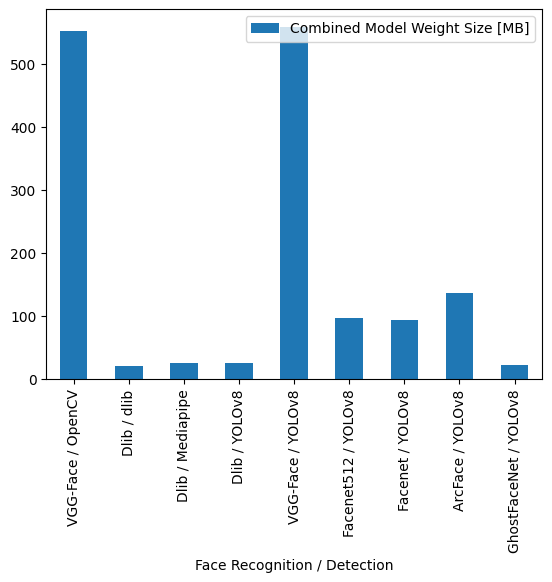

In [18]:
models_df.plot(x="Face Recognition / Detection", y="Combined Model Weight Size [MB]", kind="bar")

<Axes: xlabel='Face Recognition / Detection'>

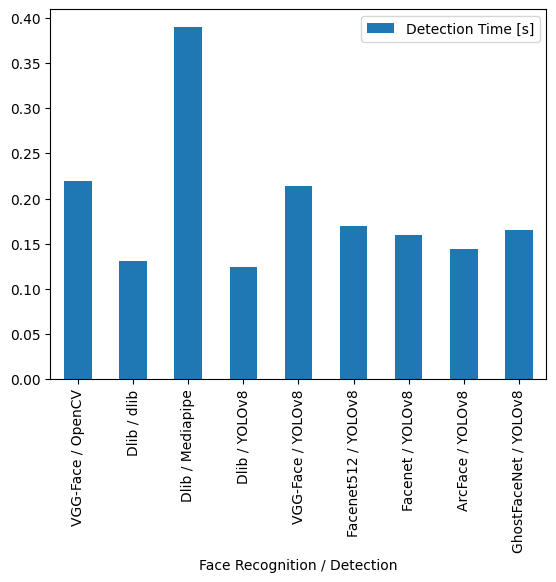

In [19]:
models_df.plot(x="Face Recognition / Detection", y="Detection Time [s]", kind="bar")